In [1]:
#Importing required libraries for analysis
#data_v1 is name of dataframe having the loan.csv raw data 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_v1=pd.read_csv('loan.csv',low_memory=False)

# Data Understanding

In [2]:
data_v1.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
data_v1.shape

(39717, 111)

In [4]:
print(data_v1.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


#### Identifying the variables that are based on loan characteristics and customer information. 
Customer behaviour variables should not be considered in this analysis as they come into existence upon approval of a loan

In [5]:
data_v1.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [6]:
#Checking number of rows for currently running loans
data_v1.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [7]:
#Filtering data_v1 dataframe
data_v1=data_v1[data_v1.loan_status.isin(['Fully Paid','Charged Off'])]

In [8]:
req_cols=[
'loan_amnt',
'funded_amnt',
'funded_amnt_inv',
'term',
'int_rate',
'grade',
'sub_grade',
'emp_title',
'emp_length',
'home_ownership',
'annual_inc',
'verification_status',
'issue_d',
'loan_status',
'purpose',
'title',
'zip_code',
'addr_state',
'dti',
'pub_rec_bankruptcies']

In [9]:
#Selecting only required columns
# Data_v2 is created from Data_v1 dataframe
data_v2=data_v1[req_cols]

In [10]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   grade                 38577 non-null  object 
 6   sub_grade             38577 non-null  object 
 7   emp_title             36191 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  title              

In [11]:
data_v2.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'pub_rec_bankruptcies'],
      dtype='object')

In [12]:
data_v2.reset_index(drop=True,inplace=True)

In [13]:
data_v2.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,B,B2,NaN,10+ years,RENT,24000.0,Verified,01-12-2011,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,01-12-2011,Charged Off,car,bike,309xx,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96%,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,01-12-2011,Fully Paid,small_business,real estate business,606xx,IL,8.72,0.0


#### Categorical and Quantitative variables

In [14]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   grade                 38577 non-null  object 
 6   sub_grade             38577 non-null  object 
 7   emp_title             36191 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  title              

In [15]:
#Categorical variables are stored in categ_var and Quantitative variables are given in quant_var

categ_var=['term','grade', 'sub_grade','emp_title', 'emp_length', 'home_ownership', 'verification_status','issue_d', 'loan_status','purpose','title', 'zip_code', 'addr_state', 'pub_rec_bankruptcies']
quant_var=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'annual_inc', 'dti']

In [16]:
len(categ_var)

14

In [17]:
len(quant_var)

6

## Data Cleaning

In [18]:
#Removing Duplicates if present in data
data_v2.drop_duplicates()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,B,B2,NaN,10+ years,RENT,24000.0,Verified,01-12-2011,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,01-12-2011,Charged Off,car,bike,309xx,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96%,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,01-12-2011,Fully Paid,small_business,real estate business,606xx,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,01-12-2011,Fully Paid,other,personel,917xx,CA,20.00,0.0
4,5000,5000,5000.0,36 months,7.90%,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,01-12-2011,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38572,2500,2500,1075.0,36 months,8.07%,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,01-07-2007,Fully Paid,home_improvement,Home Improvement,802xx,CO,11.33,NaN
38573,8500,8500,875.0,36 months,10.28%,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,01-07-2007,Fully Paid,credit_card,Retiring credit card debt,274xx,NC,6.40,NaN
38574,5000,5000,1325.0,36 months,8.07%,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,01-07-2007,Fully Paid,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,NaN
38575,5000,5000,650.0,36 months,7.43%,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,01-07-2007,Fully Paid,other,JAL Loan,208xx,MD,3.72,NaN


In [19]:
data_v2.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [20]:
#Renaming keywords appropriately
data_v2['emp_length']=data_v2.emp_length.str.replace('< 1','0 to 1')
data_v2['emp_length']=data_v2.emp_length.str.replace("+",' and above')

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\3263679217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v2['emp_length']=data_v2.emp_length.str.replace('< 1','0 to 1')
C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\3263679217.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_v2['emp_length']=data_v2.emp_length.str.replace("+",' and above')
C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\3263679217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [21]:
data_v2.emp_length.value_counts()

10 and above years    8488
0 to 1 year           4508
2 years               4291
3 years               4012
4 years               3342
5 years               3194
1 year                3169
6 years               2168
7 years               1711
8 years               1435
9 years               1226
Name: emp_length, dtype: int64

In [22]:
#Removing text keywords from data
data_v2['term']=data_v2.term.str.rstrip('months').astype('int')
data_v2.term

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\70930123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v2['term']=data_v2.term.str.rstrip('months').astype('int')


0        36
1        60
2        36
3        36
4        36
         ..
38572    36
38573    36
38574    36
38575    36
38576    36
Name: term, Length: 38577, dtype: int32

In [23]:
#Removing % from interest rate column and making the data type as float
data_v2['int_rate']=data_v2.int_rate.str.strip('%').astype('float')
pd.set_option('display.precision',2)

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\3543830067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v2['int_rate']=data_v2.int_rate.str.strip('%').astype('float')


In [24]:
data_v2.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,annual_inc,dti,pub_rec_bankruptcies
count,38577.00,38577.00,38577.00,38577.00,38577.00,3.86e+04,38577.00,37880.00
mean,11047.03,10784.06,10222.48,41.90,11.93,6.88e+04,13.27,0.04
std,7348.44,7090.31,7022.72,10.33,3.69,6.42e+04,6.67,0.20
min,500.00,500.00,0.00,36.00,5.42,4.00e+03,0.00,0.00
25%,5300.00,5200.00,5000.00,36.00,8.94,4.00e+04,8.13,0.00
50%,9600.00,9550.00,8733.44,36.00,11.71,5.89e+04,13.37,0.00
75%,15000.00,15000.00,14000.00,36.00,14.38,8.20e+04,18.56,0.00
max,35000.00,35000.00,35000.00,60.00,24.40,6.00e+06,29.99,2.00


In [25]:
data_v2.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
grade                      0
sub_grade                  0
emp_title               2386
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

In [26]:
#Creating a dataframe data_desc which gives information about nulls, unique values, count etc about all columns in Data_v2
data_desc=pd.DataFrame(dict(nulls=data_v2.isna().sum(),nuniq=data_v2.nunique(),count=data_v2.count(),min_val=data_v2.min(),max_val=data_v2.max()),data_v2.columns)

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\3014007899.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_desc=pd.DataFrame(dict(nulls=data_v2.isna().sum(),nuniq=data_v2.nunique(),count=data_v2.count(),min_val=data_v2.min(),max_val=data_v2.max()),data_v2.columns)


In [27]:
data_desc

,nulls,nuniq,count,min_val,max_val
loan_amnt,0,870,38577,500,35000
funded_amnt,0,1019,38577,500,35000
funded_amnt_inv,0,8050,38577,0.0,35000.0
term,0,2,38577,36,60
int_rate,0,370,38577,5.42,24.4
grade,0,7,38577,A,G
sub_grade,0,35,38577,A1,G5
emp_title,2386,28027,36191,NaN,NaN
emp_length,1033,11,37544,NaN,NaN
home_ownership,0,5,38577,MORTGAGE,RENT


In [28]:
#Removing excess columns which are not useful to analysis
data_v2.drop(['zip_code','emp_title','title'],axis=1,inplace=True)

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\4083643488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v2.drop(['zip_code','emp_title','title'],axis=1,inplace=True)


In [29]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  int32  
 4   int_rate              38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   sub_grade             38577 non-null  object 
 7   emp_length            37544 non-null  object 
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  purpose               38577 non-null  object 
 14  addr_state            38577 non-null  object 
 15  dti                

In [30]:
data_desc=pd.DataFrame(dict(nulls=data_v2.isna().sum(),nuniq=data_v2.nunique(),count=data_v2.count(),min_val=data_v2.min(),max_val=data_v2.max()),data_v2.columns)

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\2083864281.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_desc=pd.DataFrame(dict(nulls=data_v2.isna().sum(),nuniq=data_v2.nunique(),count=data_v2.count(),min_val=data_v2.min(),max_val=data_v2.max()),data_v2.columns)


In [31]:
data_desc

,nulls,nuniq,count,min_val,max_val
loan_amnt,0,870,38577,500,35000
funded_amnt,0,1019,38577,500,35000
funded_amnt_inv,0,8050,38577,0.0,35000.0
term,0,2,38577,36,60
int_rate,0,370,38577,5.42,24.4
grade,0,7,38577,A,G
sub_grade,0,35,38577,A1,G5
emp_length,1033,11,37544,NaN,NaN
home_ownership,0,5,38577,MORTGAGE,RENT
annual_inc,0,5215,38577,4000.0,6000000.0


In [32]:
data_v2.shape

(38577, 17)

In [33]:
data_v2.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

In [34]:
data_v2[~data_v2.emp_length.isna()]['emp_length'].value_counts()

10 and above years    8488
0 to 1 year           4508
2 years               4291
3 years               4012
4 years               3342
5 years               3194
1 year                3169
6 years               2168
7 years               1711
8 years               1435
9 years               1226
Name: emp_length, dtype: int64

In [35]:
#Filling NA/NULL values with mode for the categorical variable emp_length
data_v2['emp_length'] = data_v2['emp_length'].fillna(data_v2['emp_length'].mode()[0])

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\1371089698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v2['emp_length'] = data_v2['emp_length'].fillna(data_v2['emp_length'].mode()[0])


In [36]:
data_v2['emp_length'].value_counts()

10 and above years    9521
0 to 1 year           4508
2 years               4291
3 years               4012
4 years               3342
5 years               3194
1 year                3169
6 years               2168
7 years               1711
8 years               1435
9 years               1226
Name: emp_length, dtype: int64

In [37]:
data_v2.isna().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
pub_rec_bankruptcies    697
dtype: int64

In [38]:
data_v2[~data_v2.pub_rec_bankruptcies.isna()]['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [39]:
#Filling NA/NULL values with mode for the categorical variable pub_rec_bankruptcies
data_v2['pub_rec_bankruptcies']=data_v2['pub_rec_bankruptcies'].fillna(data_v2['pub_rec_bankruptcies'].mode()[0])

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\644330846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v2['pub_rec_bankruptcies']=data_v2['pub_rec_bankruptcies'].fillna(data_v2['pub_rec_bankruptcies'].mode()[0])


In [40]:
data_v2['pub_rec_bankruptcies'].value_counts()

0.0    36935
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [41]:
data_v2.isna().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

In [42]:
data_v2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,B,B2,10 and above years,RENT,24000.0,Verified,01-12-2011,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60,15.27,C,C4,0 to 1 year,RENT,30000.0,Source Verified,01-12-2011,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36,15.96,C,C5,10 and above years,RENT,12252.0,Not Verified,01-12-2011,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36,13.49,C,C1,10 and above years,RENT,49200.0,Source Verified,01-12-2011,Fully Paid,other,CA,20.00,0.0
4,5000,5000,5000.0,36,7.90,A,A4,3 years,RENT,36000.0,Source Verified,01-12-2011,Fully Paid,wedding,AZ,11.20,0.0


In [43]:
data_v2['pub_rec_bankruptcies']=data_v2.pub_rec_bankruptcies.astype('int')

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\3324626449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v2['pub_rec_bankruptcies']=data_v2.pub_rec_bankruptcies.astype('int')


In [44]:
data_v2['pub_rec_bankruptcies'].value_counts()

0    36935
1     1637
2        5
Name: pub_rec_bankruptcies, dtype: int64

In [45]:
data_v2.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,B,B2,10 and above years,RENT,24000.0,Verified,01-12-2011,Fully Paid,credit_card,AZ,27.65,0
1,2500,2500,2500.0,60,15.27,C,C4,0 to 1 year,RENT,30000.0,Source Verified,01-12-2011,Charged Off,car,GA,1.00,0
2,2400,2400,2400.0,36,15.96,C,C5,10 and above years,RENT,12252.0,Not Verified,01-12-2011,Fully Paid,small_business,IL,8.72,0


## Data Analysis

In [46]:
#Creating a new column loan_statusflag as below for analysis
data_v2['loan_statusflag']=np.where(data_v2.loan_status=='Fully Paid',0,1)

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\2820741524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v2['loan_statusflag']=np.where(data_v2.loan_status=='Fully Paid',0,1)


In [47]:
data_v2['loan_statusflag'].value_counts()

0    32950
1     5627
Name: loan_statusflag, dtype: int64

In [48]:
data_v2['issue_d']

0        01-12-2011
1        01-12-2011
2        01-12-2011
3        01-12-2011
4        01-12-2011
            ...    
38572    01-07-2007
38573    01-07-2007
38574    01-07-2007
38575    01-07-2007
38576    01-06-2007
Name: issue_d, Length: 38577, dtype: object

In [49]:
#Creating issue_date, year, month columns
data_v2['year']=data_v2['issue_d'].apply(lambda x:x[6:])

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\1632622594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v2['year']=data_v2['issue_d'].apply(lambda x:x[6:])


In [50]:
data_v2.year.value_counts()

2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: year, dtype: int64

In [51]:
data_v2['day']=data_v2.issue_d.apply(lambda x:x[:2])

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\2972710642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v2['day']=data_v2.issue_d.apply(lambda x:x[:2])


In [52]:
data_v2['month']=data_v2.issue_d.apply(lambda x:x[3:5])

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\1507023398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v2['month']=data_v2.issue_d.apply(lambda x:x[3:5])


In [53]:
data_v2['issue_date']=pd.to_datetime(dict(year=data_v2.year, month=data_v2.month, day=data_v2.day))

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\2222271304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v2['issue_date']=pd.to_datetime(dict(year=data_v2.year, month=data_v2.month, day=data_v2.day))


In [54]:
data_v2.issue_date

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
38572   2007-07-01
38573   2007-07-01
38574   2007-07-01
38575   2007-07-01
38576   2007-06-01
Name: issue_date, Length: 38577, dtype: datetime64[ns]

In [55]:
data_v2.issue_date.dt.year.value_counts()

2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_date, dtype: int64

In [56]:
#Dropping excess columns and getting final data for outlier analysis
data_v2.drop(['day','issue_d','loan_status'],axis=1,inplace=True)

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\2103948422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v2.drop(['day','issue_d','loan_status'],axis=1,inplace=True)


In [57]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  int32         
 4   int_rate              38577 non-null  float64       
 5   grade                 38577 non-null  object        
 6   sub_grade             38577 non-null  object        
 7   emp_length            38577 non-null  object        
 8   home_ownership        38577 non-null  object        
 9   annual_inc            38577 non-null  float64       
 10  verification_status   38577 non-null  object        
 11  purpose               38577 non-null  object        
 12  addr_state            38577 non-null  object        
 13  dti             

In [58]:
#Creating a column for making calculations easier
data_v2['Flag']=1

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\2147518732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v2['Flag']=1


Outlier analysis

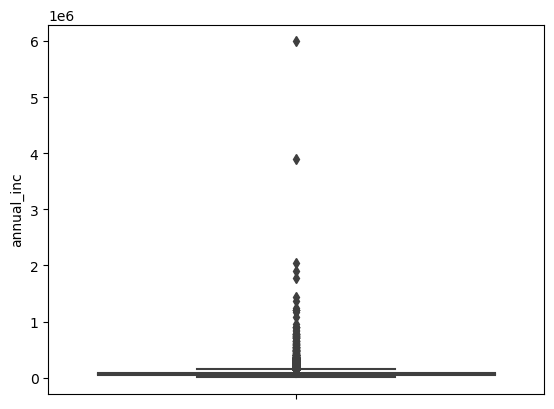

In [59]:
sns.boxplot(data=data_v2,y='annual_inc')
plt.rcParams["figure.figsize"] = [6, 5]

<AxesSubplot:ylabel='int_rate'>

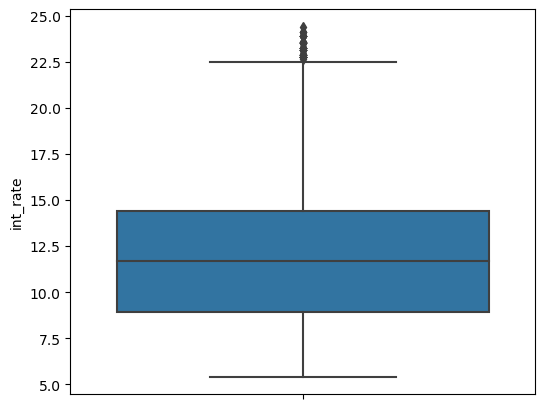

In [60]:
sns.boxplot(data=data_v2,y='int_rate')

<AxesSubplot:ylabel='loan_amnt'>

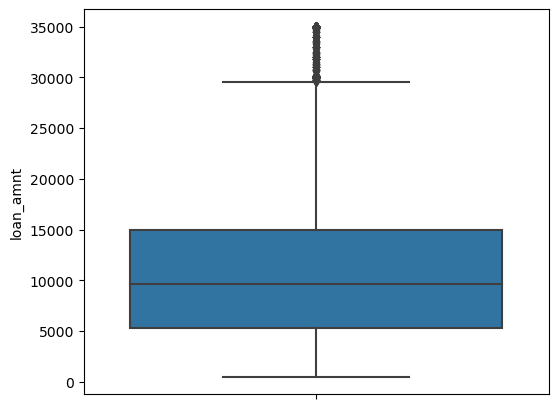

In [61]:
sns.boxplot(data=data_v2,y='loan_amnt')

<AxesSubplot:ylabel='dti'>

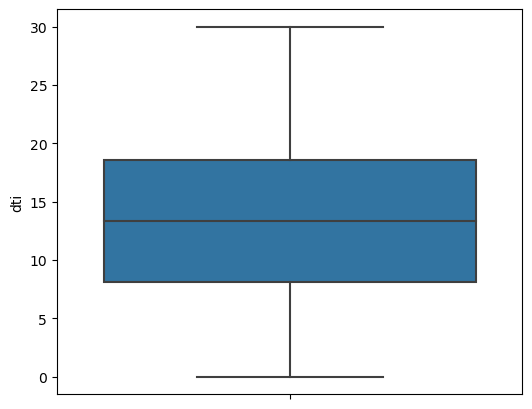

In [62]:
sns.boxplot(data=data_v2,y='dti')

In [63]:
#Removing outliers from annual income field and storing this data in Dataframe Data_v3. Data_v3 will be final dataframe 
#and any further changes to dataframe will be stored in same variable
q1=data_v2.annual_inc.quantile(0.25)
q3=data_v2.annual_inc.quantile(0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=max(q1-1.5*iqr,data_v2.annual_inc.min())
data_v3=data_v2[(data_v2.annual_inc<=ub)&(data_v2.annual_inc>=lb)]
data_v3

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,pub_rec_bankruptcies,loan_statusflag,year,month,issue_date,Flag
0,5000,5000,4975.0,36,10.65,B,B2,10 and above years,RENT,24000.0,Verified,credit_card,AZ,27.65,0,0,2011,12,2011-12-01,1
1,2500,2500,2500.0,60,15.27,C,C4,0 to 1 year,RENT,30000.0,Source Verified,car,GA,1.00,0,1,2011,12,2011-12-01,1
2,2400,2400,2400.0,36,15.96,C,C5,10 and above years,RENT,12252.0,Not Verified,small_business,IL,8.72,0,0,2011,12,2011-12-01,1
3,10000,10000,10000.0,36,13.49,C,C1,10 and above years,RENT,49200.0,Source Verified,other,CA,20.00,0,0,2011,12,2011-12-01,1
4,5000,5000,5000.0,36,7.90,A,A4,3 years,RENT,36000.0,Source Verified,wedding,AZ,11.20,0,0,2011,12,2011-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,5000,5000,700.0,36,8.70,B,B1,5 years,MORTGAGE,75000.0,Not Verified,credit_card,CO,15.55,0,0,2007,07,2007-07-01,1
38572,2500,2500,1075.0,36,8.07,A,A4,4 years,MORTGAGE,110000.0,Not Verified,home_improvement,CO,11.33,0,0,2007,07,2007-07-01,1
38573,8500,8500,875.0,36,10.28,C,C1,3 years,RENT,18000.0,Not Verified,credit_card,NC,6.40,0,0,2007,07,2007-07-01,1
38574,5000,5000,1325.0,36,8.07,A,A4,0 to 1 year,MORTGAGE,100000.0,Not Verified,debt_consolidation,MA,2.30,0,0,2007,07,2007-07-01,1


In [64]:
#Removing outliers from int rate field and storing this data in Dataframe Data_v3
q11=data_v2.int_rate.quantile(0.25)
q31=data_v2.int_rate.quantile(0.75)
iqr1=q31-q11
ub1=q31+1.5*iqr1
lb1=max(q11-1.5*iqr1,data_v2.int_rate.min())

data_v3=data_v3[(data_v3.int_rate<=ub1)&(data_v3.int_rate>=lb1)]
data_v3

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,pub_rec_bankruptcies,loan_statusflag,year,month,issue_date,Flag
0,5000,5000,4975.0,36,10.65,B,B2,10 and above years,RENT,24000.0,Verified,credit_card,AZ,27.65,0,0,2011,12,2011-12-01,1
1,2500,2500,2500.0,60,15.27,C,C4,0 to 1 year,RENT,30000.0,Source Verified,car,GA,1.00,0,1,2011,12,2011-12-01,1
2,2400,2400,2400.0,36,15.96,C,C5,10 and above years,RENT,12252.0,Not Verified,small_business,IL,8.72,0,0,2011,12,2011-12-01,1
3,10000,10000,10000.0,36,13.49,C,C1,10 and above years,RENT,49200.0,Source Verified,other,CA,20.00,0,0,2011,12,2011-12-01,1
4,5000,5000,5000.0,36,7.90,A,A4,3 years,RENT,36000.0,Source Verified,wedding,AZ,11.20,0,0,2011,12,2011-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,5000,5000,700.0,36,8.70,B,B1,5 years,MORTGAGE,75000.0,Not Verified,credit_card,CO,15.55,0,0,2007,07,2007-07-01,1
38572,2500,2500,1075.0,36,8.07,A,A4,4 years,MORTGAGE,110000.0,Not Verified,home_improvement,CO,11.33,0,0,2007,07,2007-07-01,1
38573,8500,8500,875.0,36,10.28,C,C1,3 years,RENT,18000.0,Not Verified,credit_card,NC,6.40,0,0,2007,07,2007-07-01,1
38574,5000,5000,1325.0,36,8.07,A,A4,0 to 1 year,MORTGAGE,100000.0,Not Verified,debt_consolidation,MA,2.30,0,0,2007,07,2007-07-01,1


In [65]:
#Removing outliers from loan amount field and storing this data in Dataframe Data_v3
q12=data_v2.loan_amnt.quantile(0.25)
q32=data_v2.loan_amnt.quantile(0.75)
iqr2=q32-q12
ub2=q32+1.5*iqr2
lb2=max(q12-1.5*iqr2,data_v2.loan_amnt.min())

data_v3=data_v3[(data_v3.loan_amnt<=ub2)&(data_v3.loan_amnt>=lb2)]
data_v3

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,pub_rec_bankruptcies,loan_statusflag,year,month,issue_date,Flag
0,5000,5000,4975.0,36,10.65,B,B2,10 and above years,RENT,24000.0,Verified,credit_card,AZ,27.65,0,0,2011,12,2011-12-01,1
1,2500,2500,2500.0,60,15.27,C,C4,0 to 1 year,RENT,30000.0,Source Verified,car,GA,1.00,0,1,2011,12,2011-12-01,1
2,2400,2400,2400.0,36,15.96,C,C5,10 and above years,RENT,12252.0,Not Verified,small_business,IL,8.72,0,0,2011,12,2011-12-01,1
3,10000,10000,10000.0,36,13.49,C,C1,10 and above years,RENT,49200.0,Source Verified,other,CA,20.00,0,0,2011,12,2011-12-01,1
4,5000,5000,5000.0,36,7.90,A,A4,3 years,RENT,36000.0,Source Verified,wedding,AZ,11.20,0,0,2011,12,2011-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,5000,5000,700.0,36,8.70,B,B1,5 years,MORTGAGE,75000.0,Not Verified,credit_card,CO,15.55,0,0,2007,07,2007-07-01,1
38572,2500,2500,1075.0,36,8.07,A,A4,4 years,MORTGAGE,110000.0,Not Verified,home_improvement,CO,11.33,0,0,2007,07,2007-07-01,1
38573,8500,8500,875.0,36,10.28,C,C1,3 years,RENT,18000.0,Not Verified,credit_card,NC,6.40,0,0,2007,07,2007-07-01,1
38574,5000,5000,1325.0,36,8.07,A,A4,0 to 1 year,MORTGAGE,100000.0,Not Verified,debt_consolidation,MA,2.30,0,0,2007,07,2007-07-01,1


#### Univariate analysis - Continuous variables

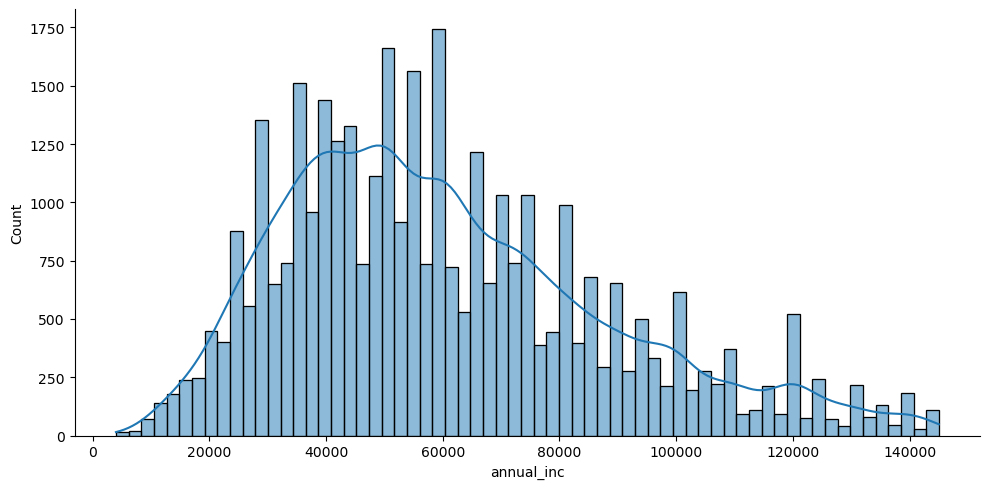

In [66]:
sns.displot(data=data_v3,x='annual_inc',kde=True,height=5,aspect=2)

<AxesSubplot:ylabel='annual_inc'>

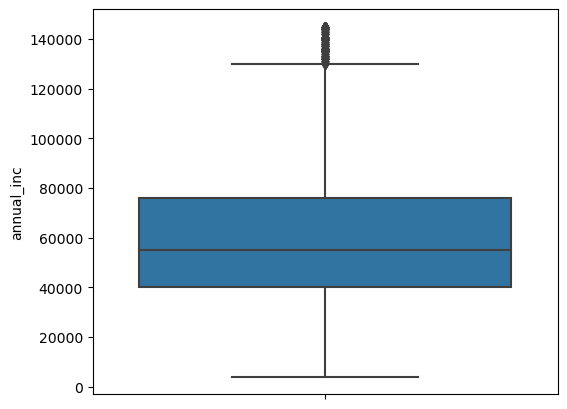

In [67]:
sns.boxplot(data=data_v3,y='annual_inc')

In [68]:
data_v3.annual_inc.describe()

count     35945.00
mean      60451.14
std       27863.51
min        4000.00
25%       40000.00
50%       55000.00
75%       76000.00
max      145000.00
Name: annual_inc, dtype: float64

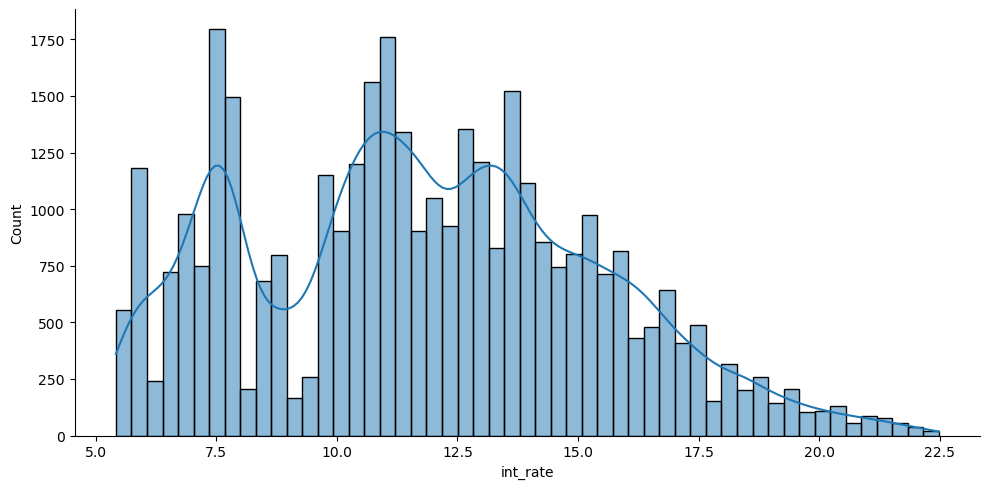

In [69]:
sns.displot(data=data_v3,x='int_rate',kde=True,height=5,aspect=2)

<AxesSubplot:ylabel='int_rate'>

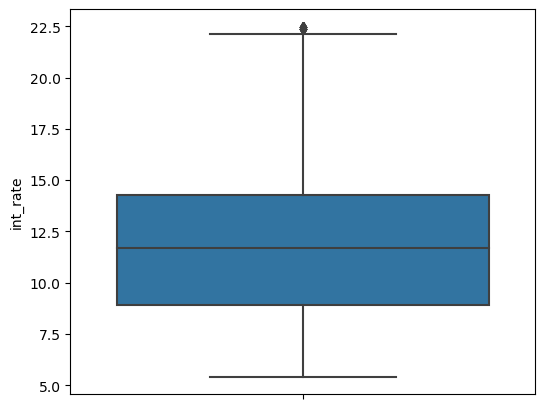

In [70]:
sns.boxplot(data=data_v3,y='int_rate')

In [71]:
data_v3.int_rate.describe()

count    35945.00
mean        11.79
std          3.59
min          5.42
25%          8.90
50%         11.71
75%         14.26
max         22.48
Name: int_rate, dtype: float64

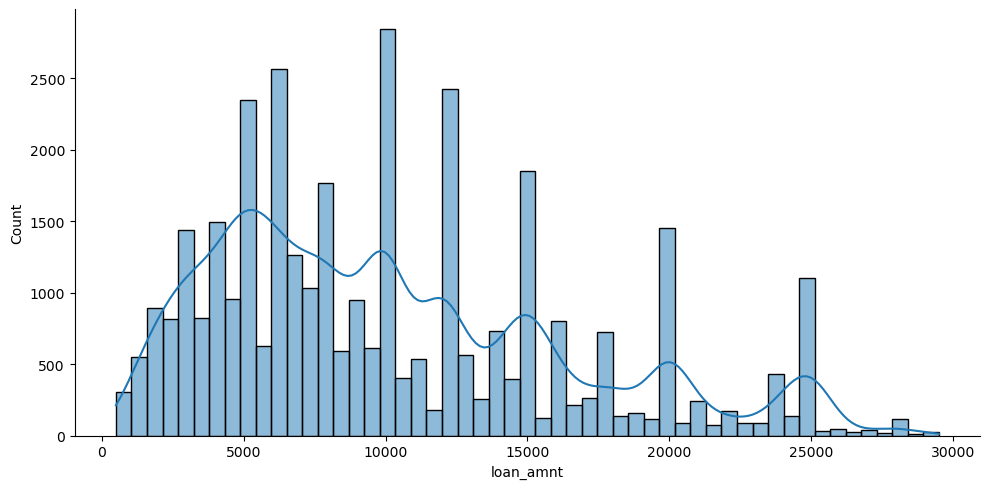

In [72]:
sns.displot(data=data_v3,x='loan_amnt',kde=True,height=5,aspect=2)

<AxesSubplot:ylabel='loan_amnt'>

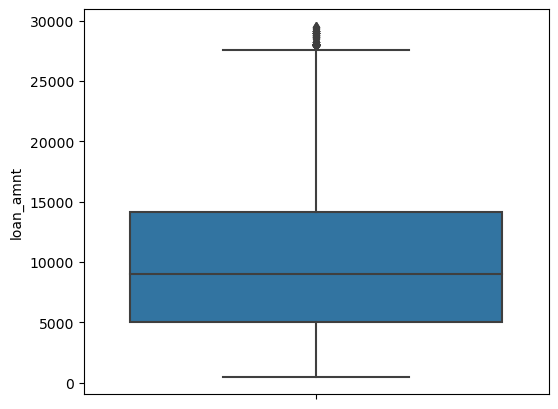

In [73]:
sns.boxplot(data=data_v3,y='loan_amnt')

In [74]:
data_v3.loan_amnt.describe()

count    35945.00
mean     10184.59
std       6262.50
min        500.00
25%       5000.00
50%       9000.00
75%      14125.00
max      29500.00
Name: loan_amnt, dtype: float64

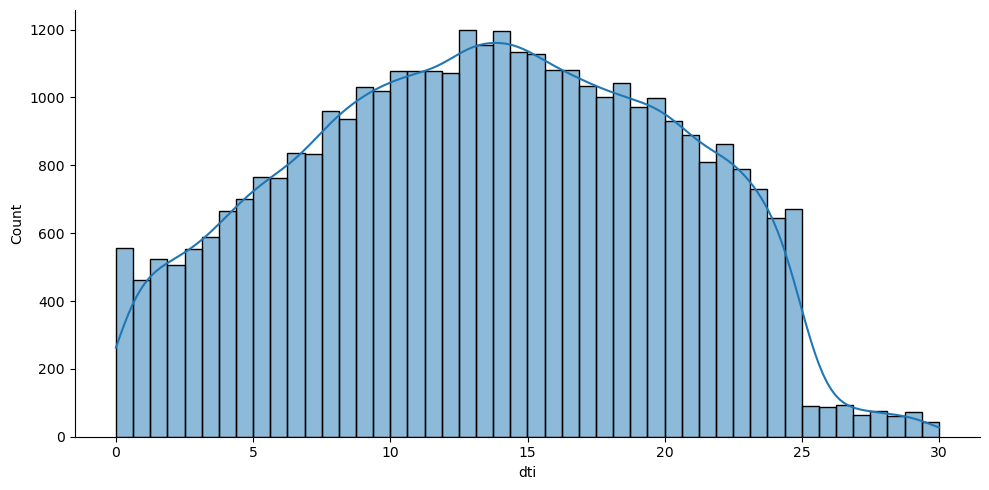

In [75]:
sns.displot(data=data_v3,x='dti',kde=True,height=5,aspect=2)

<AxesSubplot:ylabel='dti'>

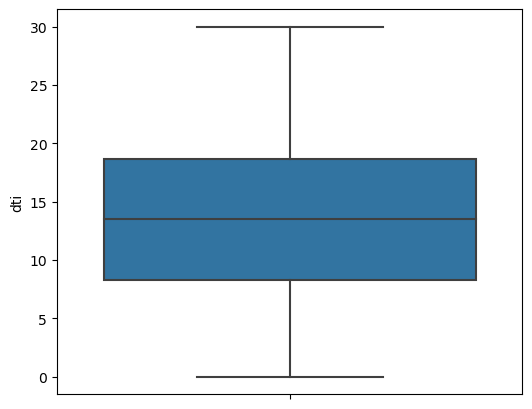

In [76]:
sns.boxplot(data=data_v3,y='dti')

In [77]:
data_v3.dti.describe()

count    35945.00
mean        13.41
std          6.66
min          0.00
25%          8.31
50%         13.53
75%         18.68
max         29.99
Name: dti, dtype: float64

#### Univariate analysis - Categorical variables

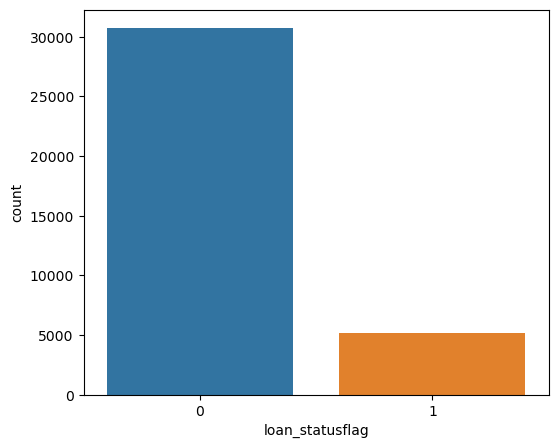


 0    30749
1     5196
Name: loan_statusflag, dtype: int64


In [78]:
ax=sns.barplot(data=data_v3,y='Flag',x='loan_statusflag',estimator=sum)
ax.set_ylabel('count')
plt.show()
print('\n',data_v3.loan_statusflag.value_counts())

In [79]:
# Grouping results from the dataframe data_v3 and renaming the names of column and creating new column of Default rate  

In [80]:
data_univar1=data_v3.groupby(by='grade')['loan_statusflag','Flag'].sum()
data_univar1['Drate']=data_univar1['loan_statusflag']/data_univar1['Flag']
data_univar1.reset_index(inplace=True)
data_univar1.rename(columns={'loan_statusflag':'Default','Flag':'Total','Drate':'Default_rate'},inplace=True)
data_univar1.sort_values(by='Default_rate',ascending=False)

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\1908886646.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_univar1=data_v3.groupby(by='grade')['loan_statusflag','Flag'].sum()


,grade,Default,Total,Default_rate
6,G,66,194,0.34
5,F,250,793,0.32
4,E,601,2241,0.27
3,D,1045,4731,0.22
2,C,1292,7369,0.18
1,B,1351,10989,0.12
0,A,591,9628,0.06


In [81]:
#Creating dual axis charts to show total loans, Defaulted loans and Default rate for each categories

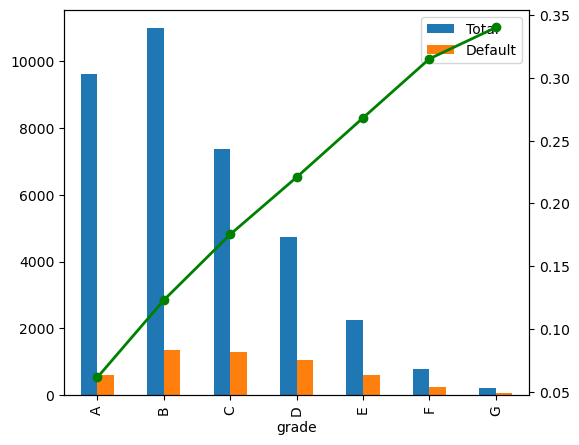

In [82]:
ax = data_univar1.plot(kind='bar', x='grade',y=['Total','Default'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),
         data_univar1['Default_rate'],
         linestyle='-',
         marker='o', linewidth=2.0,color='green')
plt.rcParams["figure.figsize"] = [10, 6]

In [83]:
data_univar2=data_v3.groupby(by='sub_grade')['loan_statusflag','Flag'].sum()
data_univar2['Drate']=data_univar2['loan_statusflag']/data_univar2['Flag']
data_univar2.reset_index(inplace=True)
data_univar2.rename(columns={'loan_statusflag':'Default','Flag':'Total','Drate':'Default_rate'},inplace=True)
data_univar2.sort_values(by='Default_rate',ascending=False)

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\2523626146.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_univar2=data_v3.groupby(by='sub_grade')['loan_statusflag','Flag'].sum()


,sub_grade,Default,Total,Default_rate
29,F5,42,84,0.50
34,G5,7,17,0.41
32,G3,11,27,0.41
31,G2,20,54,0.37
28,F4,40,127,0.31
30,G1,21,68,0.31
26,F2,60,197,0.30
23,E4,109,363,0.30
27,F3,42,143,0.29
24,E5,84,295,0.28


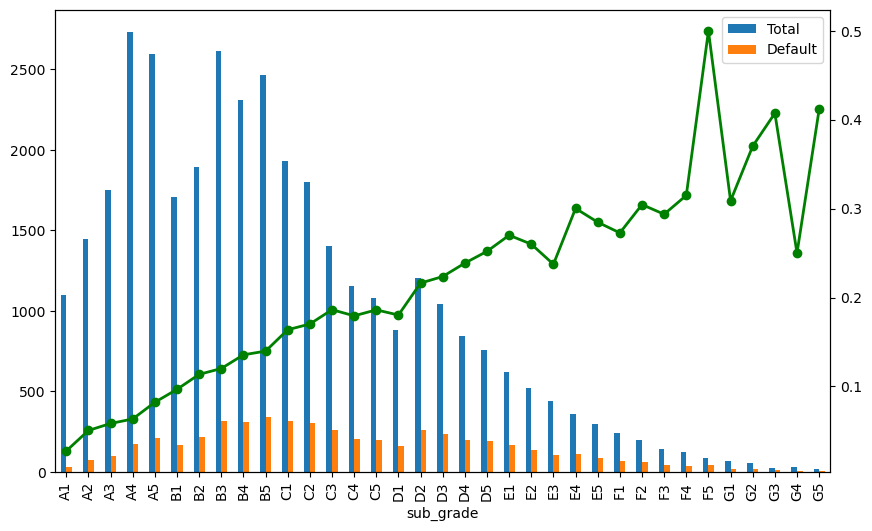

In [84]:
ax = data_univar2.plot(kind='bar', x='sub_grade',y=['Total','Default'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),
         data_univar2['Default_rate'],
         linestyle='-',
         marker='o', linewidth=2.0,color='green')
plt.rcParams["figure.figsize"] = [10, 6]

In [85]:
data_univar3=data_v3.groupby(by='emp_length')['loan_statusflag','Flag'].sum()
data_univar3['Drate']=data_univar3['loan_statusflag']/data_univar3['Flag']
data_univar3.reset_index(inplace=True)
data_univar3.rename(columns={'loan_statusflag':'Default','Flag':'Total','Drate':'Default_rate'},inplace=True)
data_univar3.sort_values(by='Default_rate',ascending=False)

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\1748469834.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_univar3=data_v3.groupby(by='emp_length')['loan_statusflag','Flag'].sum()


,emp_length,Default,Total,Default_rate
2,10 and above years,1403,8586,0.16
8,7 years,239,1605,0.15
1,1 year,439,3014,0.15
9,8 years,186,1311,0.14
6,5 years,422,2984,0.14
7,6 years,286,2033,0.14
0,0 to 1 year,599,4285,0.14
5,4 years,428,3150,0.14
4,3 years,511,3777,0.14
3,2 years,535,4061,0.13


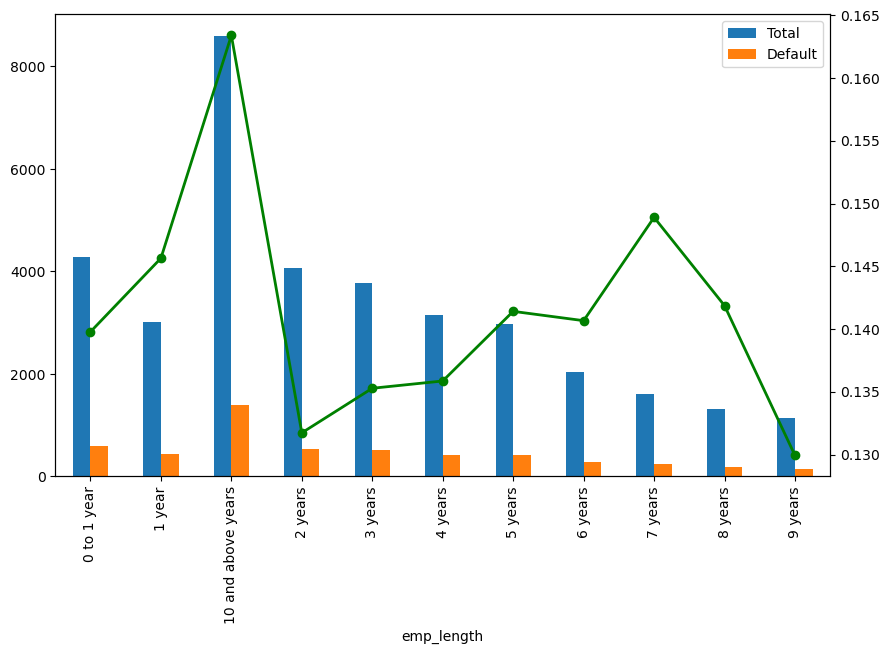

In [86]:
ax = data_univar3.plot(kind='bar', x='emp_length',y=['Total','Default'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),
         data_univar3['Default_rate'],
         linestyle='-',
         marker='o', linewidth=2.0,color='green')
plt.rcParams["figure.figsize"] = [10, 6]

In [87]:
data_univar4=data_v3.groupby(by='month')['loan_statusflag','Flag'].sum()
data_univar4['Drate']=data_univar4['loan_statusflag']/data_univar4['Flag']
data_univar4.reset_index(inplace=True)
data_univar4.rename(columns={'loan_statusflag':'Default','Flag':'Total','Drate':'Default_rate'},inplace=True)
data_univar4.sort_values(by='Default_rate',ascending=False)

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\3684669405.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_univar4=data_v3.groupby(by='month')['loan_statusflag','Flag'].sum()


,month,Default,Total,Default_rate
4,05,438,2750,0.16
11,12,628,3946,0.16
8,09,504,3202,0.16
9,10,519,3429,0.15
5,06,442,2948,0.15
10,11,544,3722,0.15
6,07,442,3141,0.14
7,08,433,3141,0.14
0,01,312,2274,0.14
3,04,342,2652,0.13


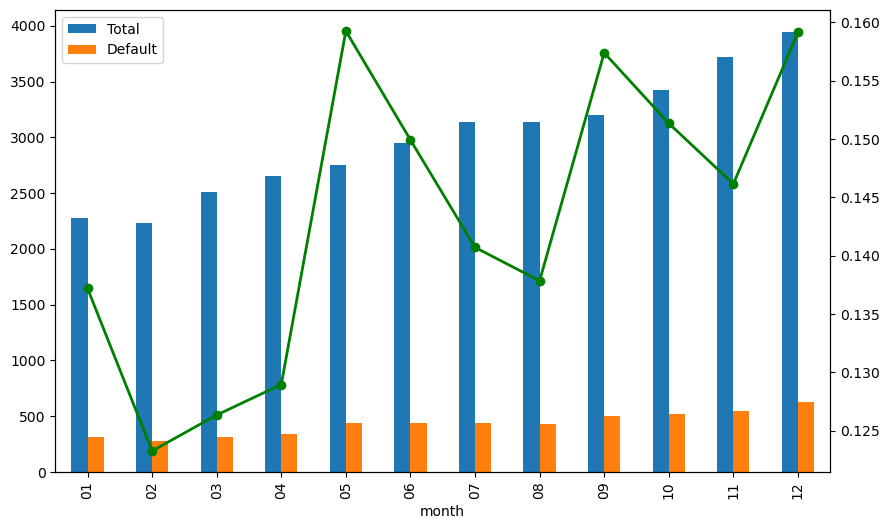

In [88]:
ax = data_univar4.plot(kind='bar', x='month',y=['Total','Default'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),
         data_univar4['Default_rate'],
         linestyle='-',
         marker='o', linewidth=2.0,color='green')
plt.rcParams["figure.figsize"] = [10, 6]

In [89]:
data_univar5=data_v3.groupby(by='term')['loan_statusflag','Flag'].sum().sort_values(by='loan_statusflag',ascending=False)
data_univar5['Drate']=data_univar5['loan_statusflag']/data_univar5['Flag']
data_univar5.reset_index(inplace=True)
data_univar5.rename(columns={'loan_statusflag':'Default','Flag':'Total','Drate':'Default_rate'},inplace=True)
data_univar5.sort_values(by='Default_rate',ascending=False)

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\3234500192.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_univar5=data_v3.groupby(by='term')['loan_statusflag','Flag'].sum().sort_values(by='loan_statusflag',ascending=False)


,term,Default,Total,Default_rate
1,60,2098,8310,0.25
0,36,3098,27635,0.11


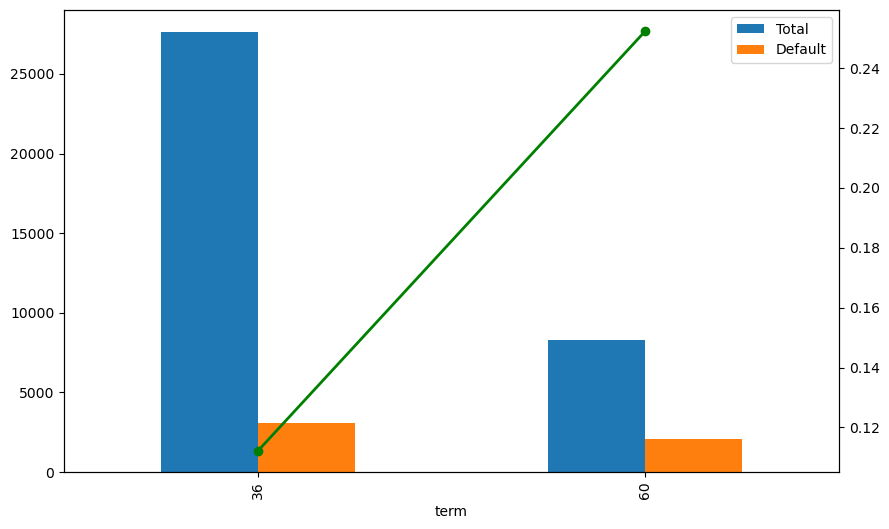

In [90]:
ax = data_univar5.plot(kind='bar', x='term',y=['Total','Default'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),
         data_univar5['Default_rate'],
         linestyle='-',
         marker='o', linewidth=2.0,color='green')
plt.rcParams["figure.figsize"] = [10, 6]

In [91]:
data_univar6=data_v3.groupby(by='home_ownership')['loan_statusflag','Flag'].sum()
data_univar6['Drate']=data_univar6['loan_statusflag']/data_univar6['Flag']
data_univar6.reset_index(inplace=True)
data_univar6.rename(columns={'loan_statusflag':'Default','Flag':'Total','Drate':'Default_rate'},inplace=True)
data_univar6.sort_values(by='Default_rate',ascending=False)

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\2809402366.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_univar6=data_v3.groupby(by='home_ownership')['loan_statusflag','Flag'].sum()


,home_ownership,Default,Total,Default_rate
2,OTHER,17,93,0.18
4,RENT,2695,17809,0.15
3,OWN,421,2813,0.15
0,MORTGAGE,2063,15227,0.14
1,NONE,0,3,0.00


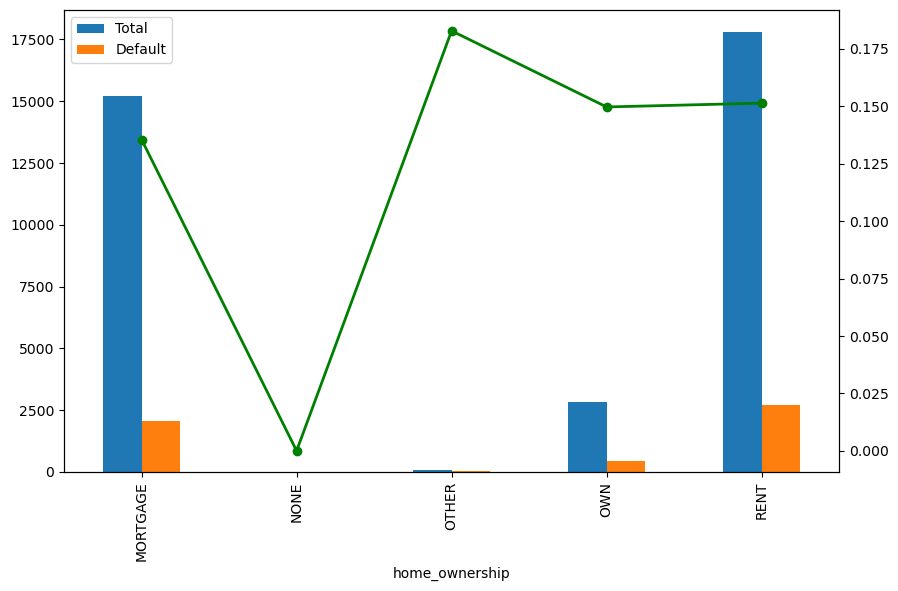

In [92]:
ax = data_univar6.plot(kind='bar', x='home_ownership',y=['Total','Default'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),
         data_univar6['Default_rate'],
         linestyle='-',
         marker='o', linewidth=2.0,color='green')
plt.rcParams["figure.figsize"] = [10, 6]

In [93]:
data_univar7=data_v3.groupby(by='verification_status')['loan_statusflag','Flag'].sum()
data_univar7['Drate']=data_univar7['loan_statusflag']/data_univar7['Flag']
data_univar7.reset_index(inplace=True)
data_univar7.rename(columns={'loan_statusflag':'Default','Flag':'Total','Drate':'Default_rate'},inplace=True)
data_univar7.sort_values(by='Default_rate',ascending=False)

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\2945537252.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_univar7=data_v3.groupby(by='verification_status')['loan_statusflag','Flag'].sum()


,verification_status,Default,Total,Default_rate
2,Verified,1761,10562,0.17
1,Source Verified,1342,9078,0.15
0,Not Verified,2093,16305,0.13


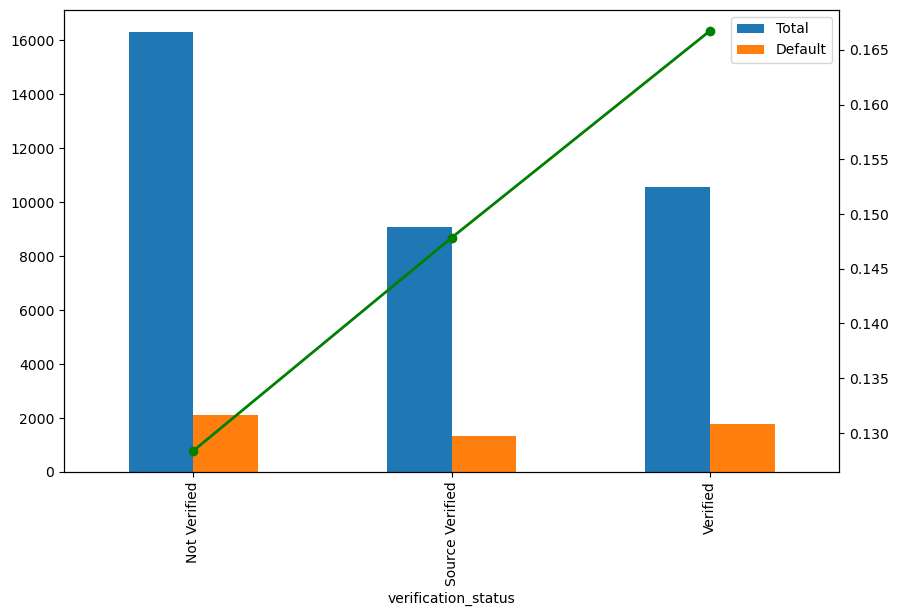

In [94]:
ax = data_univar7.plot(kind='bar', x='verification_status',y=['Total','Default'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),
         data_univar7['Default_rate'],
         linestyle='-',
         marker='o', linewidth=2.0,color='green')
plt.rcParams["figure.figsize"] = [10, 6]

In [95]:
data_univar8=data_v3.groupby(by='purpose')['loan_statusflag','Flag'].sum()
data_univar8['Drate']=data_univar8['loan_statusflag']/data_univar8['Flag']
data_univar8.reset_index(inplace=True)
data_univar8.rename(columns={'loan_statusflag':'Default','Flag':'Total','Drate':'Default_rate'},inplace=True)
data_univar8.sort_values(by='Default_rate',ascending=False)

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\3070182606.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_univar8=data_v3.groupby(by='purpose')['loan_statusflag','Flag'].sum()


,purpose,Default,Total,Default_rate
11,small_business,416,1548,0.27
10,renewable_energy,17,93,0.18
3,educational,54,313,0.17
8,moving,90,549,0.16
9,other,593,3666,0.16
7,medical,102,639,0.16
5,house,51,326,0.16
2,debt_consolidation,2542,16852,0.15
12,vacation,52,364,0.14
4,home_improvement,313,2508,0.12


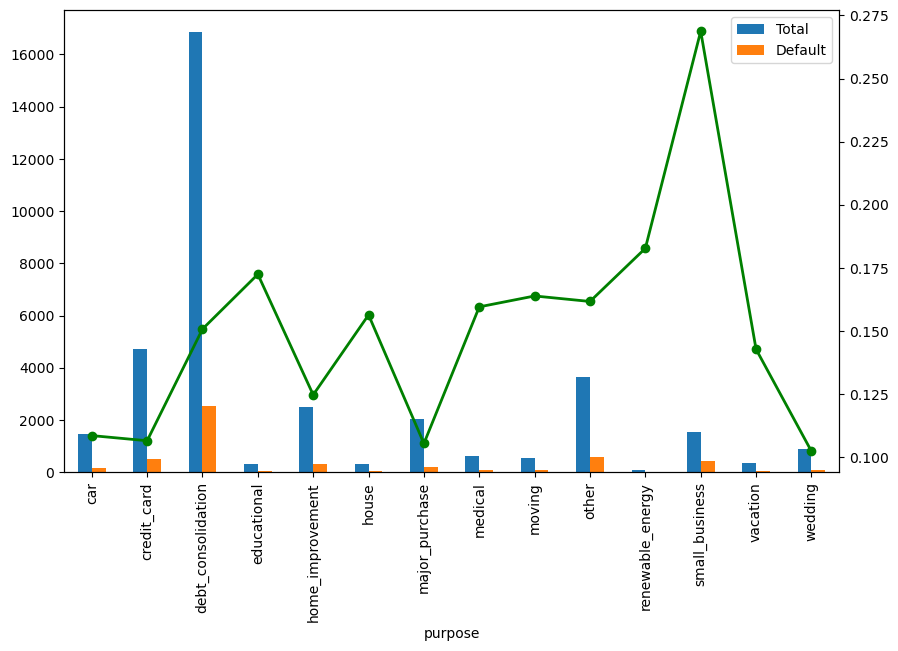

In [96]:
ax = data_univar8.plot(kind='bar', x='purpose',y=['Total','Default'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),
         data_univar8['Default_rate'],
         linestyle='-',
         marker='o', linewidth=2.0,color='green')
plt.rcParams["figure.figsize"] = [10, 6]

In [97]:
data_univar9=data_v3.groupby(by='addr_state')['loan_statusflag','Flag'].sum()
data_univar9['Drate']=data_univar9['loan_statusflag']/data_univar9['Flag']
data_univar9.reset_index(inplace=True)
data_univar9.rename(columns={'loan_statusflag':'Default','Flag':'Total','Drate':'Default_rate'},inplace=True)
data_univar9.sort_values(by='Default_rate',ascending=False)

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\1523798105.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_univar9=data_v3.groupby(by='addr_state')['loan_statusflag','Flag'].sum()


,addr_state,Default,Total,Default_rate
28,NE,3,5,0.60
32,NV,98,447,0.22
40,SD,12,61,0.20
0,AK,13,67,0.19
9,FL,467,2612,0.18
11,HI,28,157,0.18
24,MO,109,637,0.17
31,NM,29,173,0.17
13,ID,1,6,0.17
4,CA,1036,6439,0.16


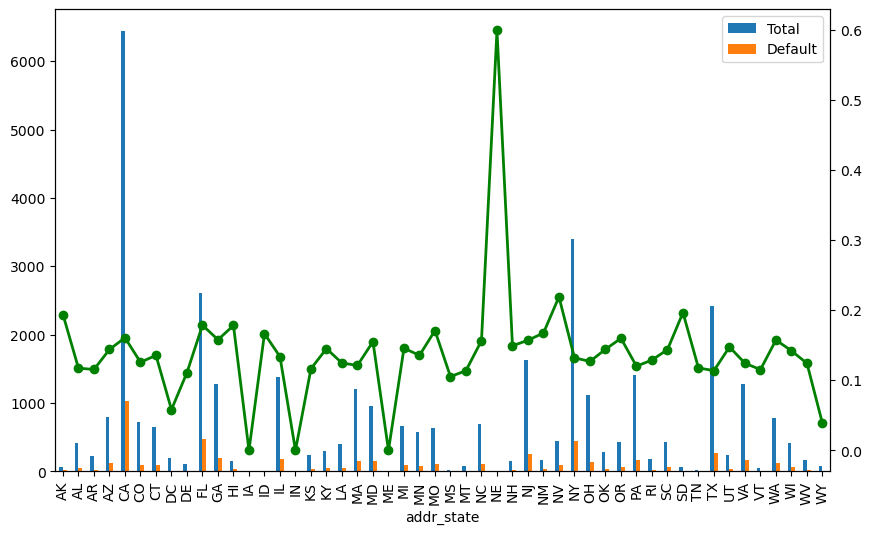

In [98]:
ax = data_univar9.plot(kind='bar', x='addr_state',y=['Total','Default'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),
         data_univar9['Default_rate'],
         linestyle='-',
         marker='o', linewidth=2.0,color='green')
plt.rcParams["figure.figsize"] = [15, 8]

In [99]:
data_univar10=data_v3.groupby(by='pub_rec_bankruptcies')['loan_statusflag','Flag'].sum()
data_univar10['Drate']=data_univar10['loan_statusflag']/data_univar10['Flag']
data_univar10.reset_index(inplace=True)
data_univar10.rename(columns={'loan_statusflag':'Default','Flag':'Total','Drate':'Default_rate'},inplace=True)
data_univar10.sort_values(by='Default_rate',ascending=False)

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\2903706223.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_univar10=data_v3.groupby(by='pub_rec_bankruptcies')['loan_statusflag','Flag'].sum()


,pub_rec_bankruptcies,Default,Total,Default_rate
2,2,2,5,0.40
1,1,349,1578,0.22
0,0,4845,34362,0.14


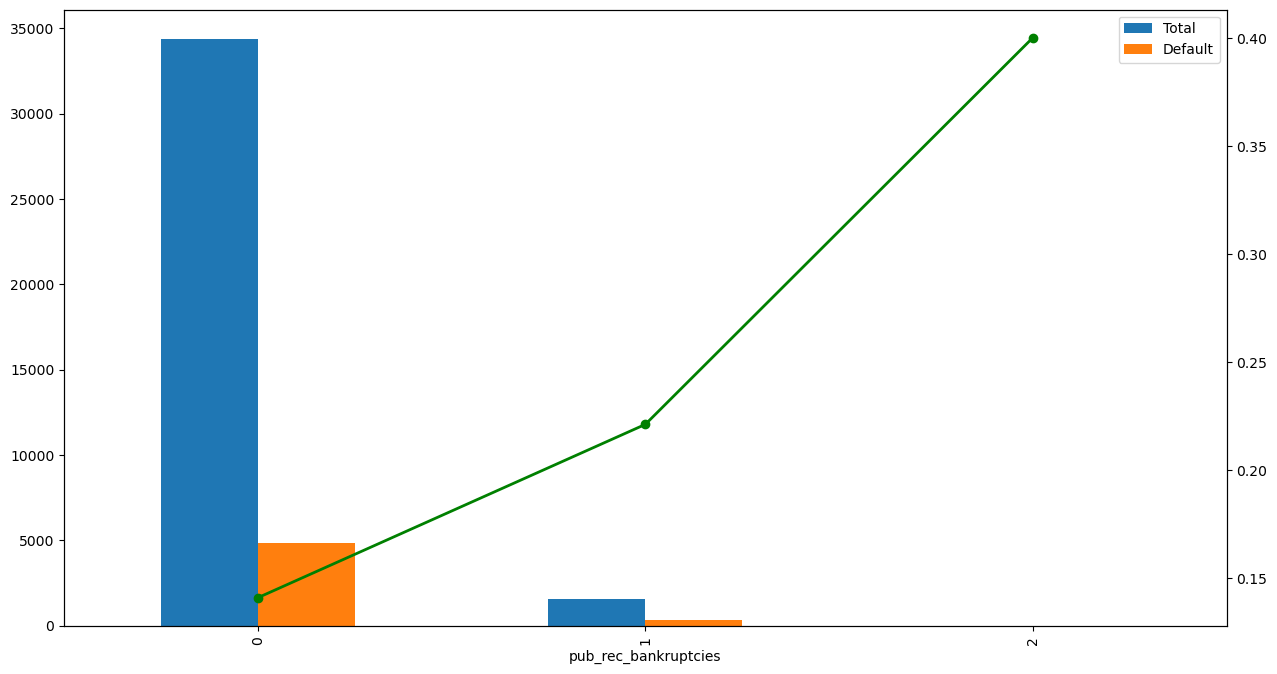

In [100]:
ax = data_univar10.plot(kind='bar', x='pub_rec_bankruptcies',y=['Total','Default'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),
         data_univar10['Default_rate'],
         linestyle='-',
         marker='o', linewidth=2.0,color='green')
plt.rcParams["figure.figsize"] = [10, 6]

#### Bivariate analysis - Categorical to categorical 

In [101]:
# Grouping the results from dataframe data_v3 and renaming the columns and creating new column of Default rate

In [102]:
data_bivar1=data_v3.groupby(by=['emp_length','term'])['loan_statusflag','Flag'].sum()
data_bivar1['Drate']=data_bivar1['loan_statusflag']/data_bivar1['Flag']
data_bivar1.reset_index(inplace=True)
data_bivar1.rename(columns={'loan_statusflag':'Default','Flag':'Total','Drate':'Default_rate'},inplace=True)
data_bivar1.sort_values(by='Default_rate',ascending=False)

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\10905826.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_bivar1=data_v3.groupby(by=['emp_length','term'])['loan_statusflag','Flag'].sum()


,emp_length,term,Default,Total,Default_rate
5,10 and above years,60,659,2423,0.27
3,1 year,60,143,529,0.27
17,7 years,60,108,406,0.27
1,0 to 1 year,60,185,743,0.25
13,5 years,60,183,748,0.24
15,6 years,60,130,535,0.24
7,2 years,60,191,793,0.24
21,9 years,60,69,288,0.24
19,8 years,60,78,327,0.24
11,4 years,60,162,693,0.23


In [103]:
#Creating pivot tables from grouped results with new columns and plotting a heatmap

<AxesSubplot:xlabel='term', ylabel='emp_length'>

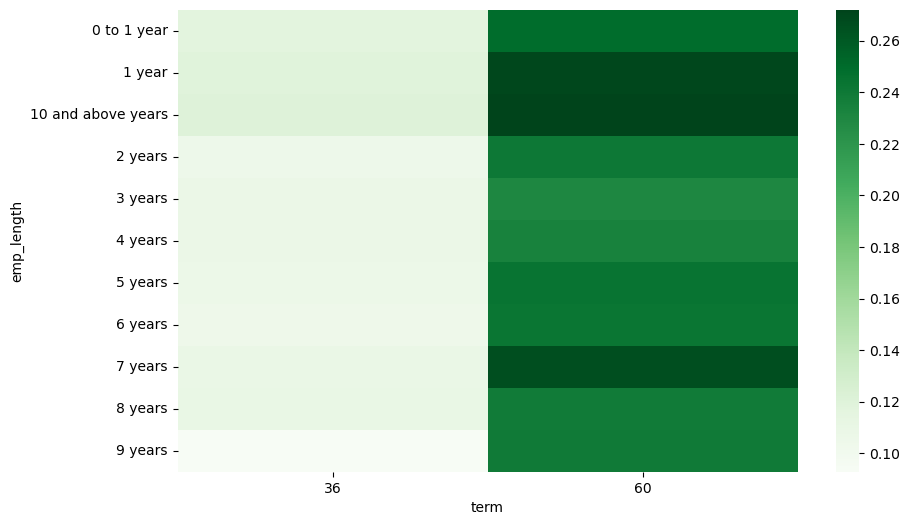

In [104]:
pivot=pd.pivot_table(data=data_bivar1,values='Default_rate',index='emp_length',columns='term',aggfunc='sum')
sns.heatmap(pivot,cmap='Greens')

In [105]:
data_bivar2=data_v3.groupby(by=['emp_length','grade'])['loan_statusflag','Flag'].sum()
data_bivar2['Drate']=data_bivar2['loan_statusflag']/data_bivar2['Flag']
data_bivar2.reset_index(inplace=True)
data_bivar2.rename(columns={'loan_statusflag':'Default','Flag':'Total','Drate':'Default_rate'},inplace=True)
data_bivar2.sort_values(by='Default_rate',ascending=False)

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\732810399.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_bivar2=data_v3.groupby(by=['emp_length','grade'])['loan_statusflag','Flag'].sum()


,emp_length,grade,Default,Total,Default_rate
13,1 year,G,9,11,0.82
48,5 years,G,5,12,0.42
75,9 years,F,7,17,0.41
12,1 year,F,25,63,0.40
19,10 and above years,F,74,200,0.37
...,...,...,...,...,...
35,4 years,A,44,815,0.05
63,8 years,A,20,377,0.05
49,6 years,A,28,552,0.05
21,2 years,A,48,981,0.05


<AxesSubplot:xlabel='grade', ylabel='emp_length'>

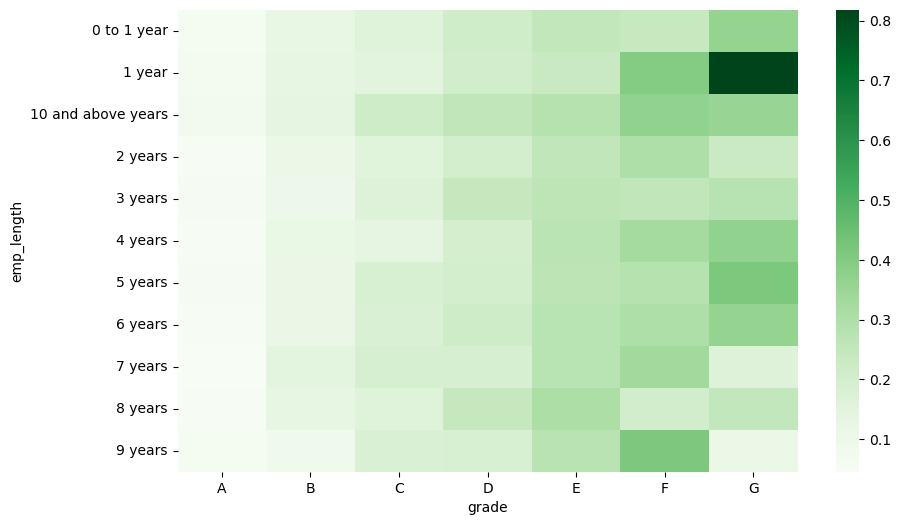

In [106]:
pivot=pd.pivot_table(data=data_bivar2,values='Default_rate',index='emp_length',columns='grade',aggfunc='sum')
sns.heatmap(pivot,cmap='Greens')

In [107]:
data_bivar3=data_v3.groupby(by=['purpose','term'])['loan_statusflag','Flag'].sum()
data_bivar3['Drate']=data_bivar3['loan_statusflag']/data_bivar3['Flag']
data_bivar3.reset_index(inplace=True)
data_bivar3.rename(columns={'loan_statusflag':'Default','Flag':'Total','Drate':'Default_rate'},inplace=True)
data_bivar3.sort_values(by='Default_rate',ascending=False)

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\339606309.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_bivar3=data_v3.groupby(by=['purpose','term'])['loan_statusflag','Flag'].sum()


,purpose,term,Default,Total,Default_rate
7,educational,60,7,16,0.44
23,small_business,60,164,414,0.40
19,other,60,193,645,0.30
25,vacation,60,15,53,0.28
11,house,60,25,89,0.28
5,debt_consolidation,60,1128,4289,0.26
3,credit_card,60,198,835,0.24
15,medical,60,33,144,0.23
22,small_business,36,252,1134,0.22
21,renewable_energy,60,5,23,0.22


<AxesSubplot:xlabel='term', ylabel='purpose'>

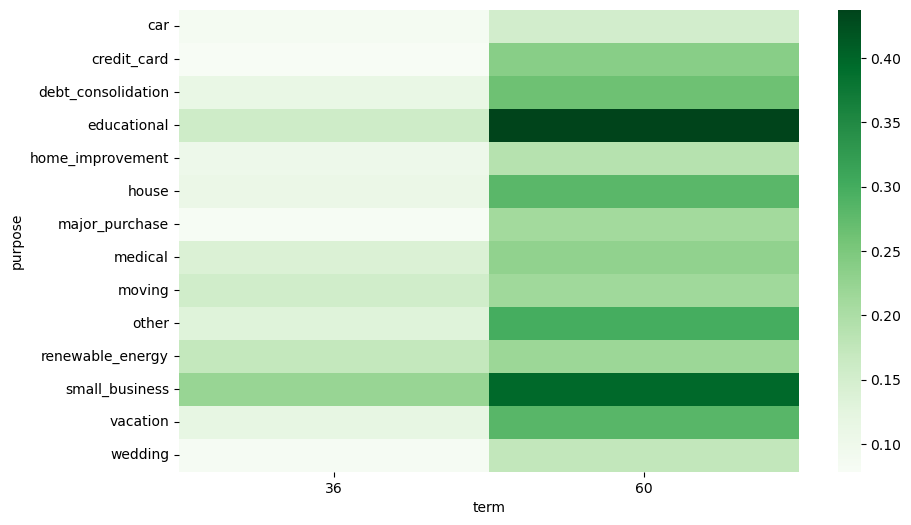

In [108]:
pivot=pd.pivot_table(data=data_bivar3,values='Default_rate',index='purpose',columns='term',aggfunc='sum')
sns.heatmap(pivot,cmap='Greens')

In [109]:
data_bivar4=data_v3.groupby(by=['purpose','verification_status'])['loan_statusflag','Flag'].sum()
data_bivar4['Drate']=data_bivar4['loan_statusflag']/data_bivar4['Flag']
data_bivar4.reset_index(inplace=True)
data_bivar4.rename(columns={'loan_statusflag':'Default','Flag':'Total','Drate':'Default_rate'},inplace=True)
data_bivar4.sort_values(by='Default_rate',ascending=False)

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\448850651.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_bivar4=data_v3.groupby(by=['purpose','verification_status'])['loan_statusflag','Flag'].sum()


,purpose,verification_status,Default,Total,Default_rate
35,small_business,Verified,164,552,0.30
34,small_business,Source Verified,97,368,0.26
33,small_business,Not Verified,155,628,0.25
30,renewable_energy,Not Verified,8,35,0.23
11,educational,Verified,13,57,0.23
25,moving,Source Verified,44,197,0.22
32,renewable_energy,Verified,5,23,0.22
16,house,Source Verified,15,82,0.18
15,house,Not Verified,23,130,0.18
29,other,Verified,143,812,0.18


<AxesSubplot:xlabel='verification_status', ylabel='purpose'>

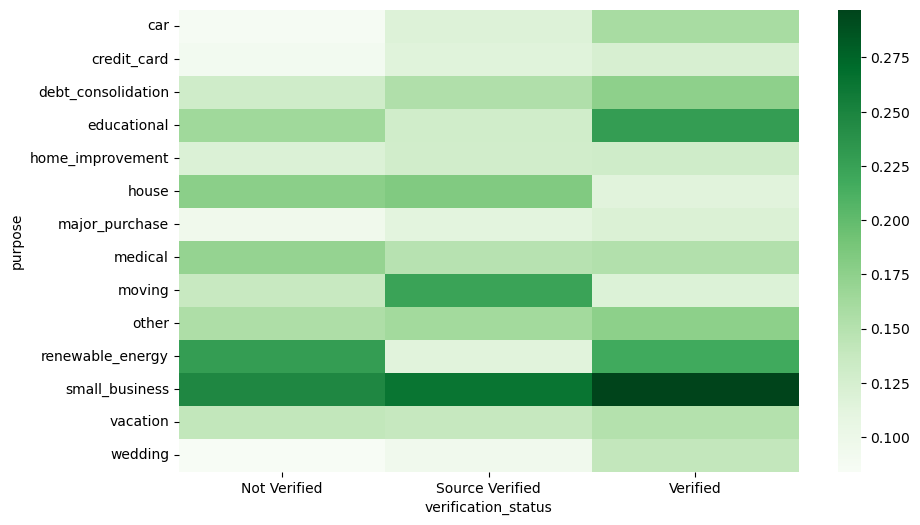

In [110]:
pivot=pd.pivot_table(data=data_bivar4,values='Default_rate',index='purpose',columns='verification_status',aggfunc='sum')
sns.heatmap(pivot,cmap='Greens')

In [111]:
data_bivar5=data_v3.groupby(by=['purpose','home_ownership'])['loan_statusflag','Flag'].sum()
data_bivar5['Drate']=data_bivar5['loan_statusflag']/data_bivar5['Flag']
data_bivar5.reset_index(inplace=True)
data_bivar5.rename(columns={'loan_statusflag':'Default','Flag':'Total','Drate':'Default_rate'},inplace=True)
data_bivar5.sort_values(by='Default_rate',ascending=False)

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\2101385699.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_bivar5=data_v3.groupby(by=['purpose','home_ownership'])['loan_statusflag','Flag'].sum()


,purpose,home_ownership,Default,Total,Default_rate
34,moving,OTHER,1,1,1.00
1,car,OTHER,1,2,0.50
46,small_business,OTHER,4,10,0.40
47,small_business,OWN,30,94,0.32
48,small_business,RENT,208,691,0.30
15,educational,OWN,5,20,0.25
35,moving,OWN,6,24,0.25
45,small_business,MORTGAGE,174,753,0.23
44,renewable_energy,RENT,7,33,0.21
18,home_improvement,OTHER,1,5,0.20


<AxesSubplot:xlabel='home_ownership', ylabel='purpose'>

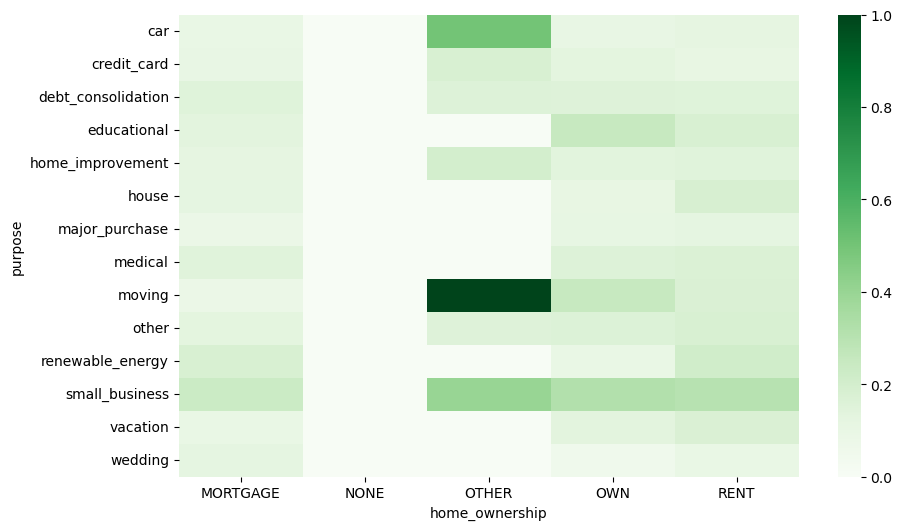

In [112]:
pivot=pd.pivot_table(data=data_bivar5,values='Default_rate',index='purpose',columns='home_ownership',aggfunc='sum',fill_value=0.0)
sns.heatmap(pivot,cmap='Greens')

In [113]:
data_bivar6=data_v3.groupby(by=['addr_state','purpose'])['loan_statusflag','Flag'].sum()
data_bivar6['Drate']=data_bivar6['loan_statusflag']/data_bivar6['Flag']
data_bivar6.reset_index(inplace=True)
data_bivar6.rename(columns={'loan_statusflag':'Default','Flag':'Total','Drate':'Default_rate'},inplace=True)
data_bivar6.sort_values(by='Default_rate',ascending=False)

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\2809550373.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_bivar6=data_v3.groupby(by=['addr_state','purpose'])['loan_statusflag','Flag'].sum()


,addr_state,purpose,Default,Total,Default_rate
328,NE,home_improvement,2,2,1.0
8,AK,vacation,1,1,1.0
215,LA,moving,1,1,1.0
154,HI,vacation,2,2,1.0
516,UT,renewable_energy,1,1,1.0
...,...,...,...,...,...
334,NH,major_purchase,0,4,0.0
335,NH,medical,0,3,0.0
336,NH,moving,0,1,0.0
337,NH,other,0,17,0.0


<AxesSubplot:xlabel='purpose', ylabel='addr_state'>

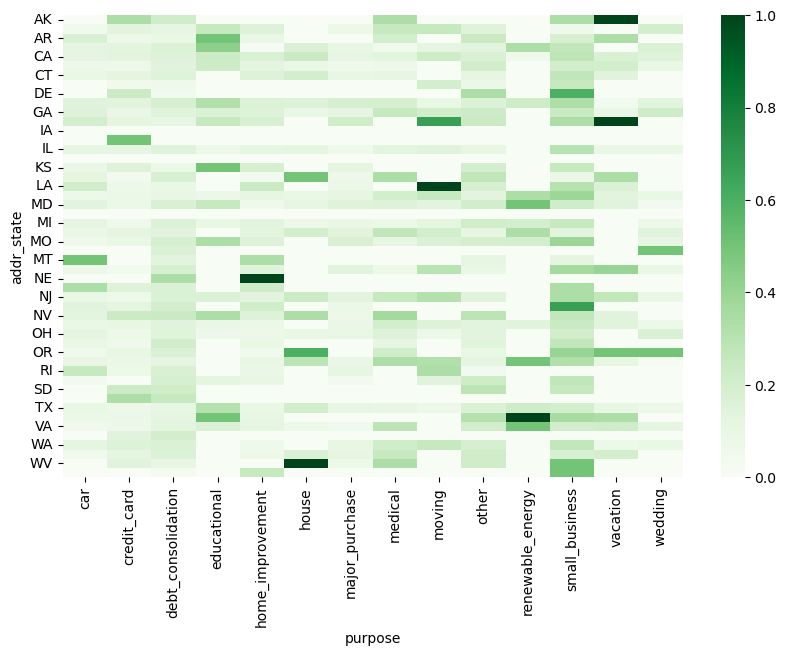

In [114]:
pivot=pd.pivot_table(data=data_bivar6,values='Default_rate',index='addr_state',columns='purpose',aggfunc='sum',fill_value=0.0)
sns.heatmap(pivot,cmap='Greens')

In [115]:
data_bivar7=data_v3.groupby(by=['addr_state','pub_rec_bankruptcies'])['loan_statusflag','Flag'].sum()
data_bivar7['Drate']=data_bivar7['loan_statusflag']/data_bivar7['Flag']
data_bivar7.reset_index(inplace=True)
data_bivar7.rename(columns={'loan_statusflag':'Default','Flag':'Total','Drate':'Default_rate'},inplace=True)
data_bivar7.sort_values(by='Default_rate',ascending=False)

C:\Users\JATINARORA\AppData\Local\Temp\ipykernel_14880\3922160487.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_bivar7=data_v3.groupby(by=['addr_state','pub_rec_bankruptcies'])['loan_statusflag','Flag'].sum()


,addr_state,pub_rec_bankruptcies,Default,Total,Default_rate
17,DC,1,2,2,1.0
56,NE,0,3,5,0.6
25,HI,1,2,4,0.5
8,AZ,2,1,2,0.5
55,NC,2,1,2,0.5
...,...,...,...,...,...
31,IN,1,0,1,0.0
80,SD,1,0,2,0.0
42,ME,0,0,3,0.0
1,AK,1,0,1,0.0


<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='addr_state'>

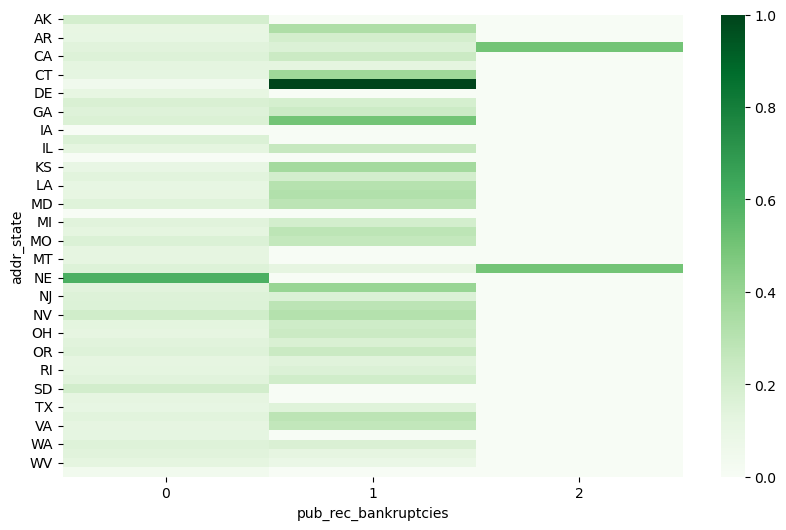

In [116]:
pivot=pd.pivot_table(data=data_bivar7,values='Default_rate',index='addr_state',columns='pub_rec_bankruptcies',aggfunc='sum',fill_value=0.0)
sns.heatmap(pivot,cmap='Greens')

#### Bivariate analysis - Continuous to categorical

In [117]:
#Creating boxplot of continuous variables like annual income, interest rate, loan amount with respect categorical variables

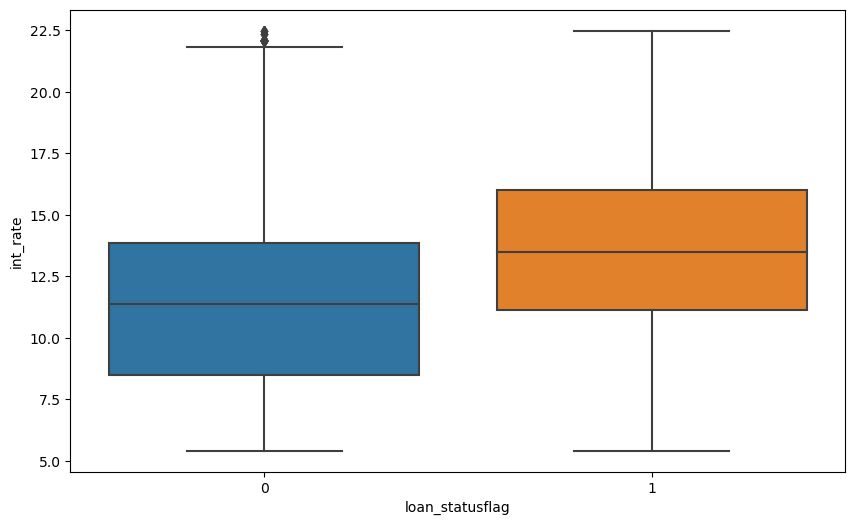

In [118]:
sns.boxplot(data=data_v3,y='int_rate',x='loan_statusflag')
plt.rcParams["figure.figsize"] = [20, 10]

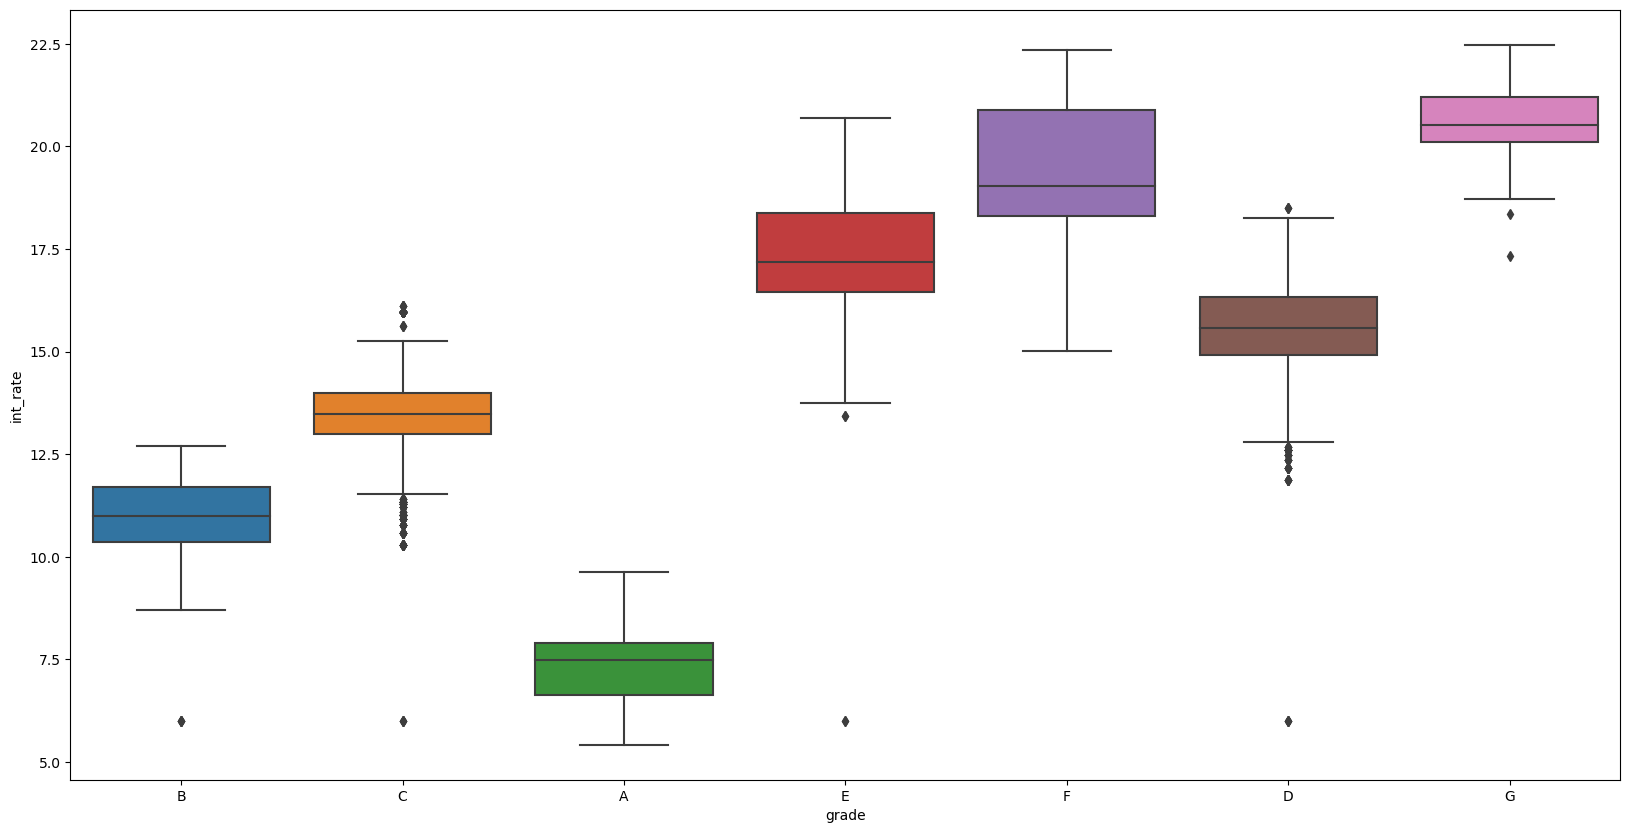

In [119]:
sns.boxplot(data=data_v3,y='int_rate',x='grade')
plt.rcParams["figure.figsize"] = [13, 6]

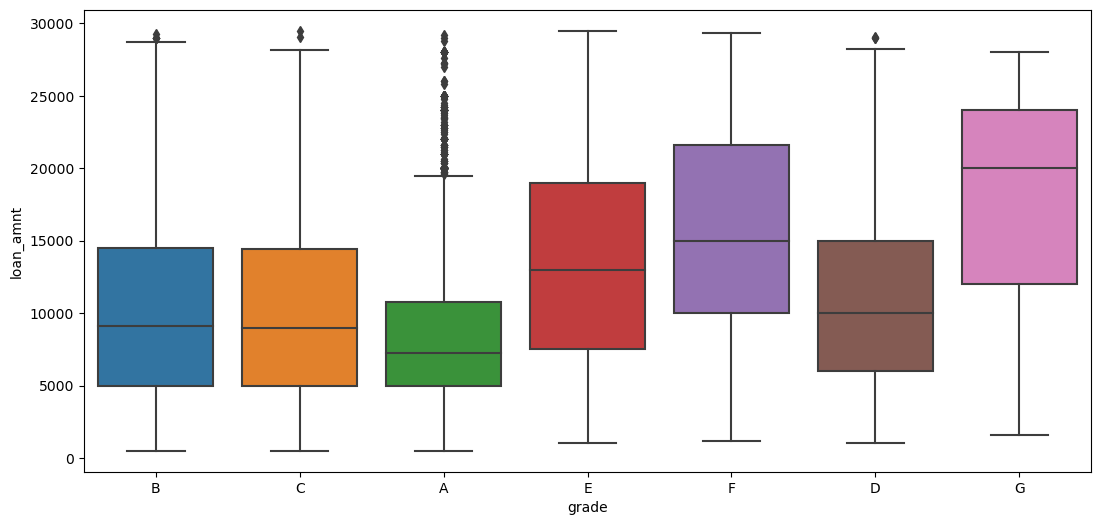

In [120]:
sns.boxplot(data=data_v3,y='loan_amnt',x='grade')
plt.rcParams["figure.figsize"] = [13, 6]

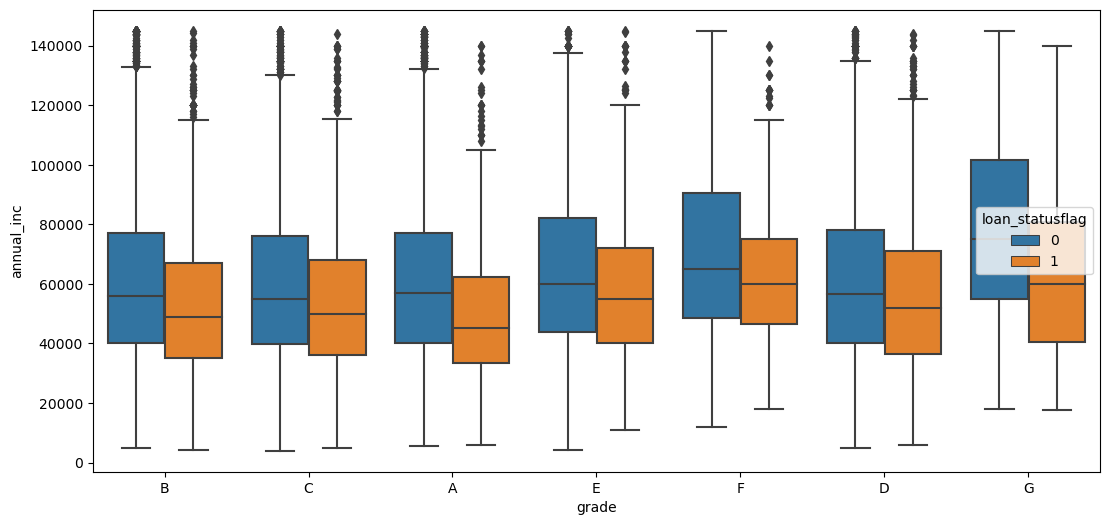

In [121]:
sns.boxplot(data=data_v3,y='annual_inc',x='grade',hue='loan_statusflag')
plt.rcParams["figure.figsize"] = [13, 6]

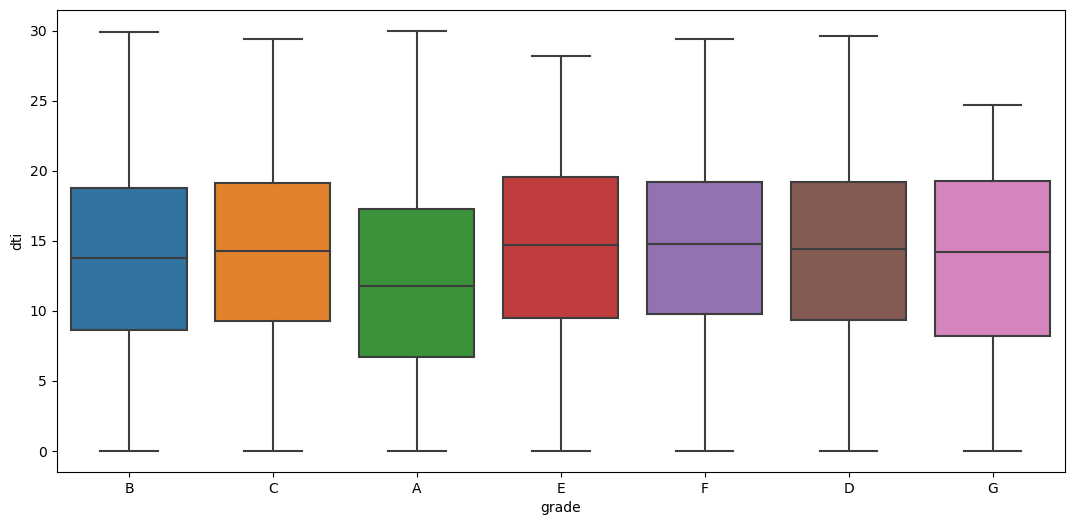

In [122]:
sns.boxplot(data=data_v3,y='dti',x='grade')
plt.rcParams["figure.figsize"] = [13, 6]

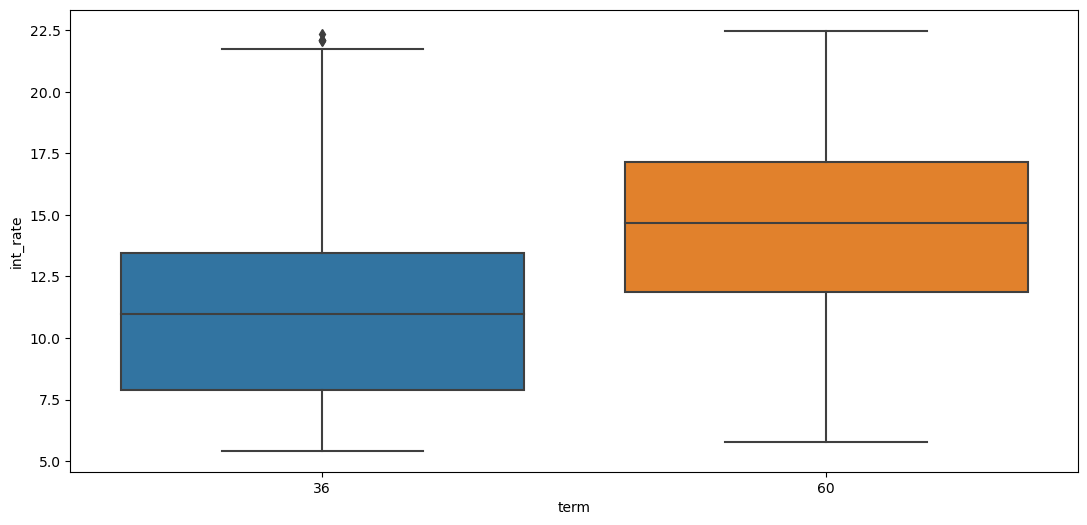

In [123]:
sns.boxplot(data=data_v3,y='int_rate',x='term')
plt.rcParams["figure.figsize"] = [13, 6]

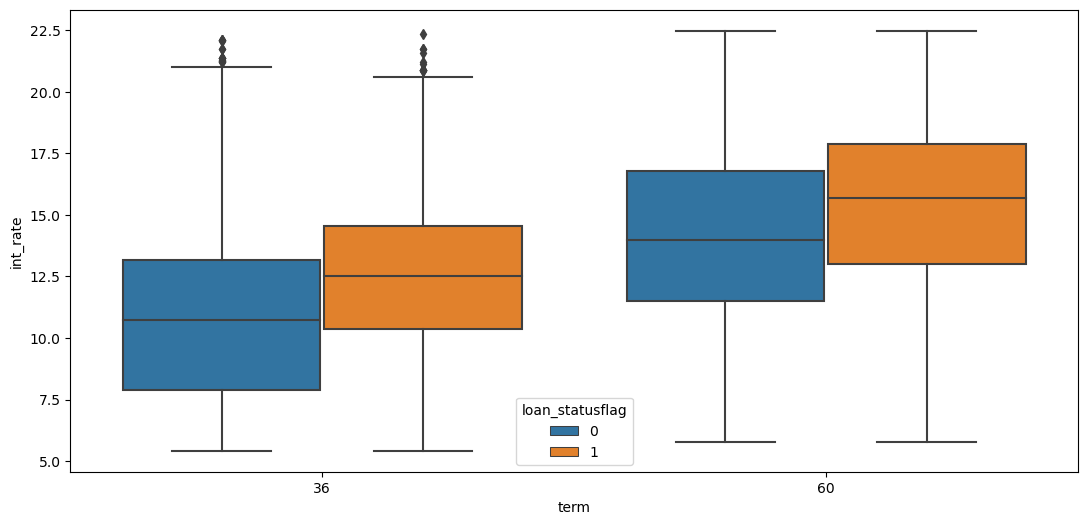

In [124]:
sns.boxplot(data=data_v3,y='int_rate',x='term',hue='loan_statusflag')
plt.rcParams["figure.figsize"] = [13, 6]

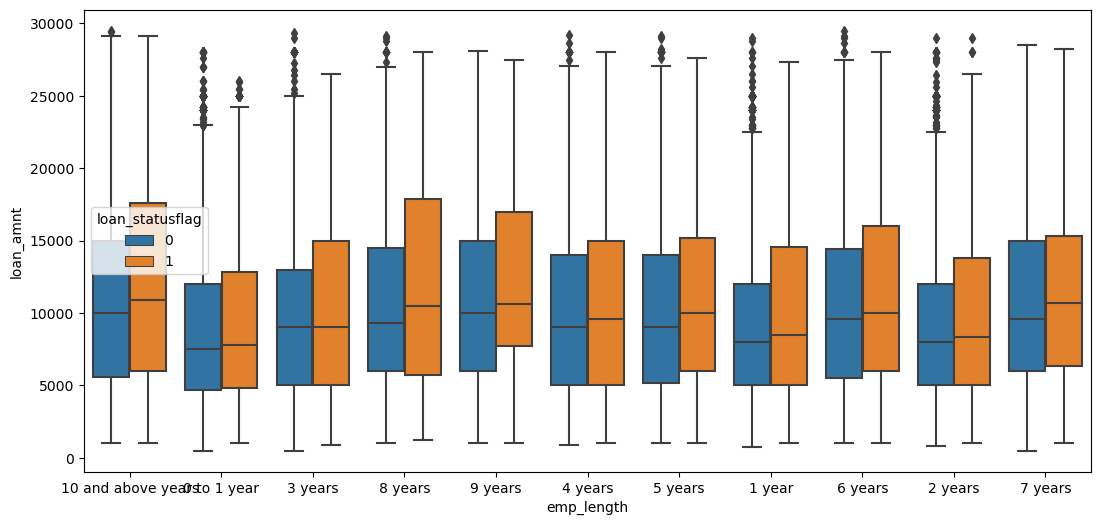

In [125]:
sns.boxplot(data=data_v3,y='loan_amnt',x='emp_length',hue='loan_statusflag')
plt.rcParams["figure.figsize"] = [20, 8]

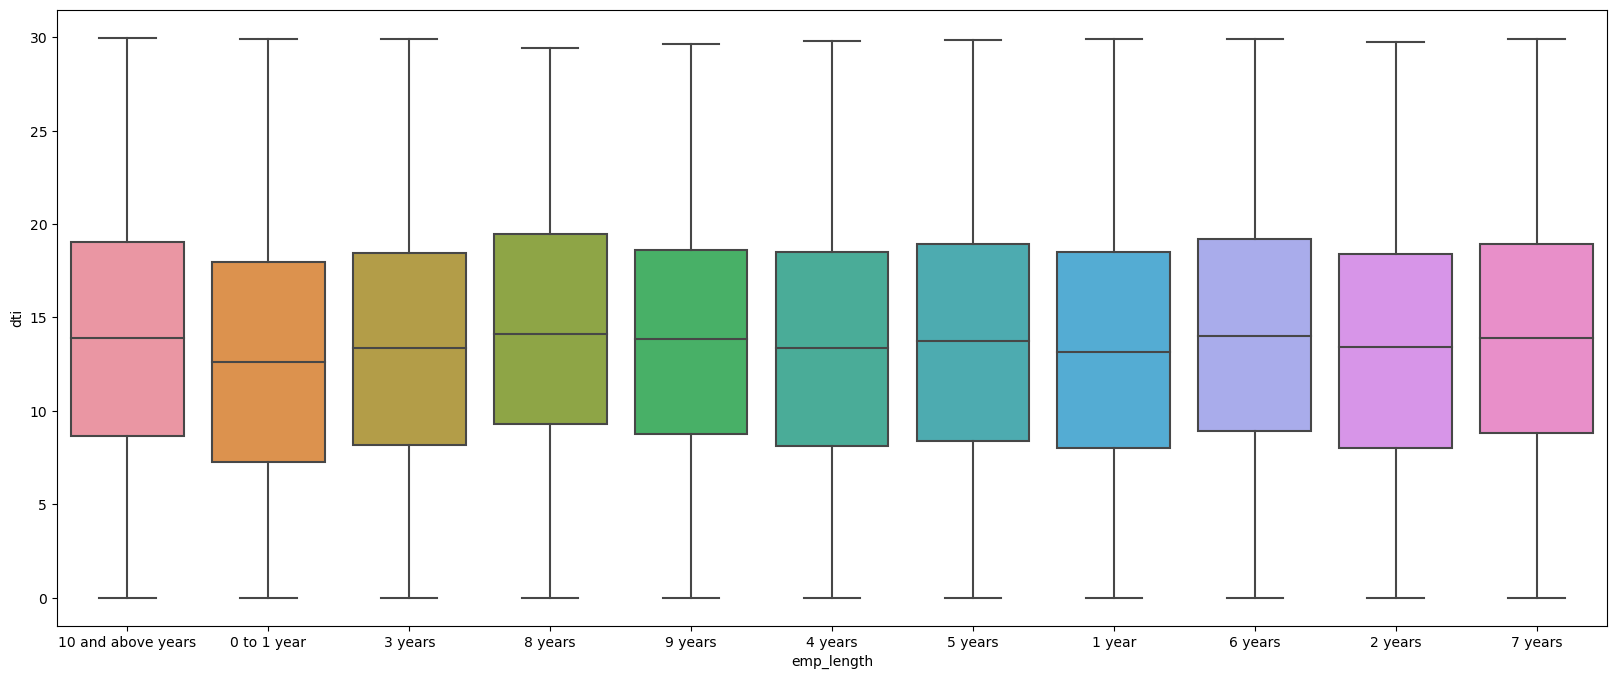

In [126]:
sns.boxplot(data=data_v3,y='dti',x='emp_length')
plt.rcParams["figure.figsize"] = [20, 8]

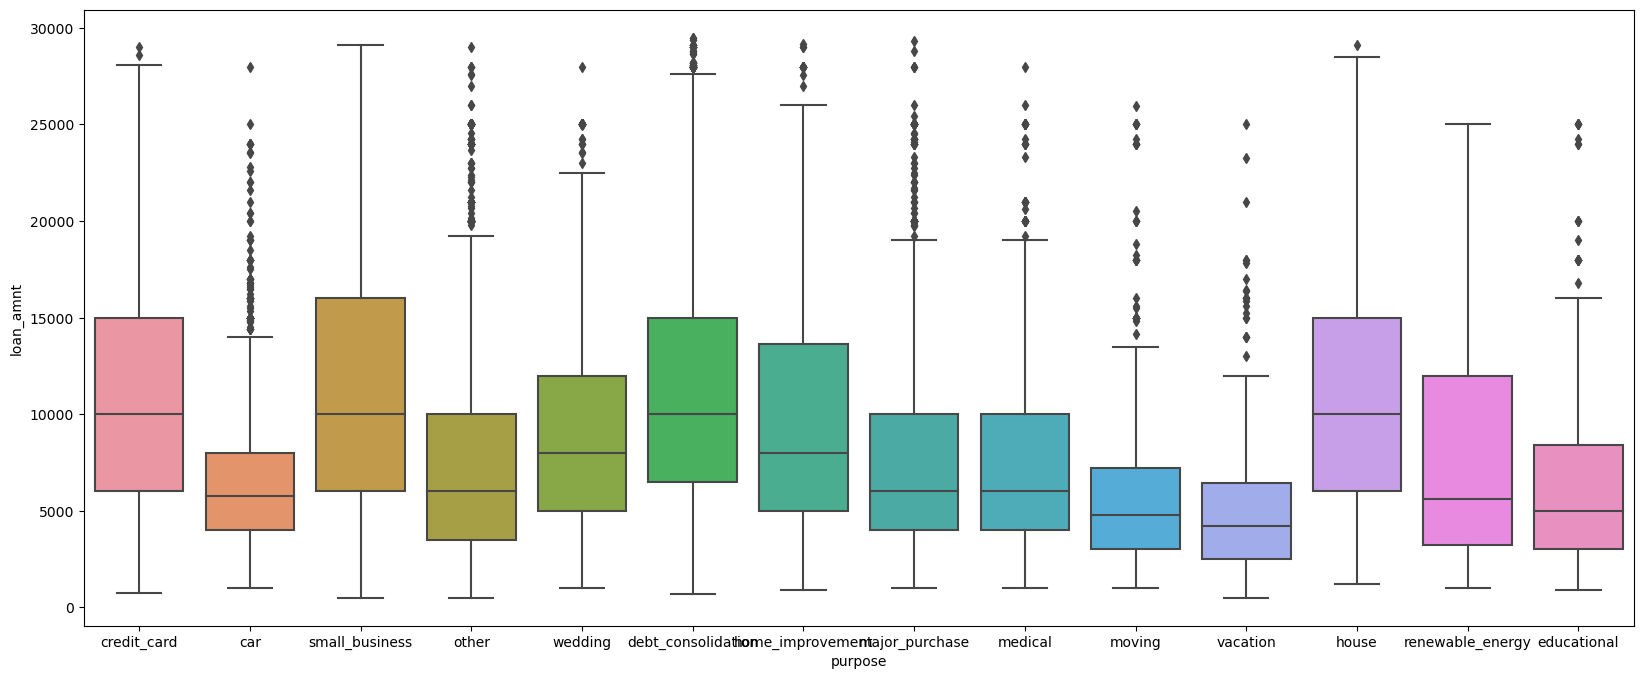

In [127]:
sns.boxplot(data=data_v3,y='loan_amnt',x='purpose')
plt.rcParams["figure.figsize"] = [25, 8]

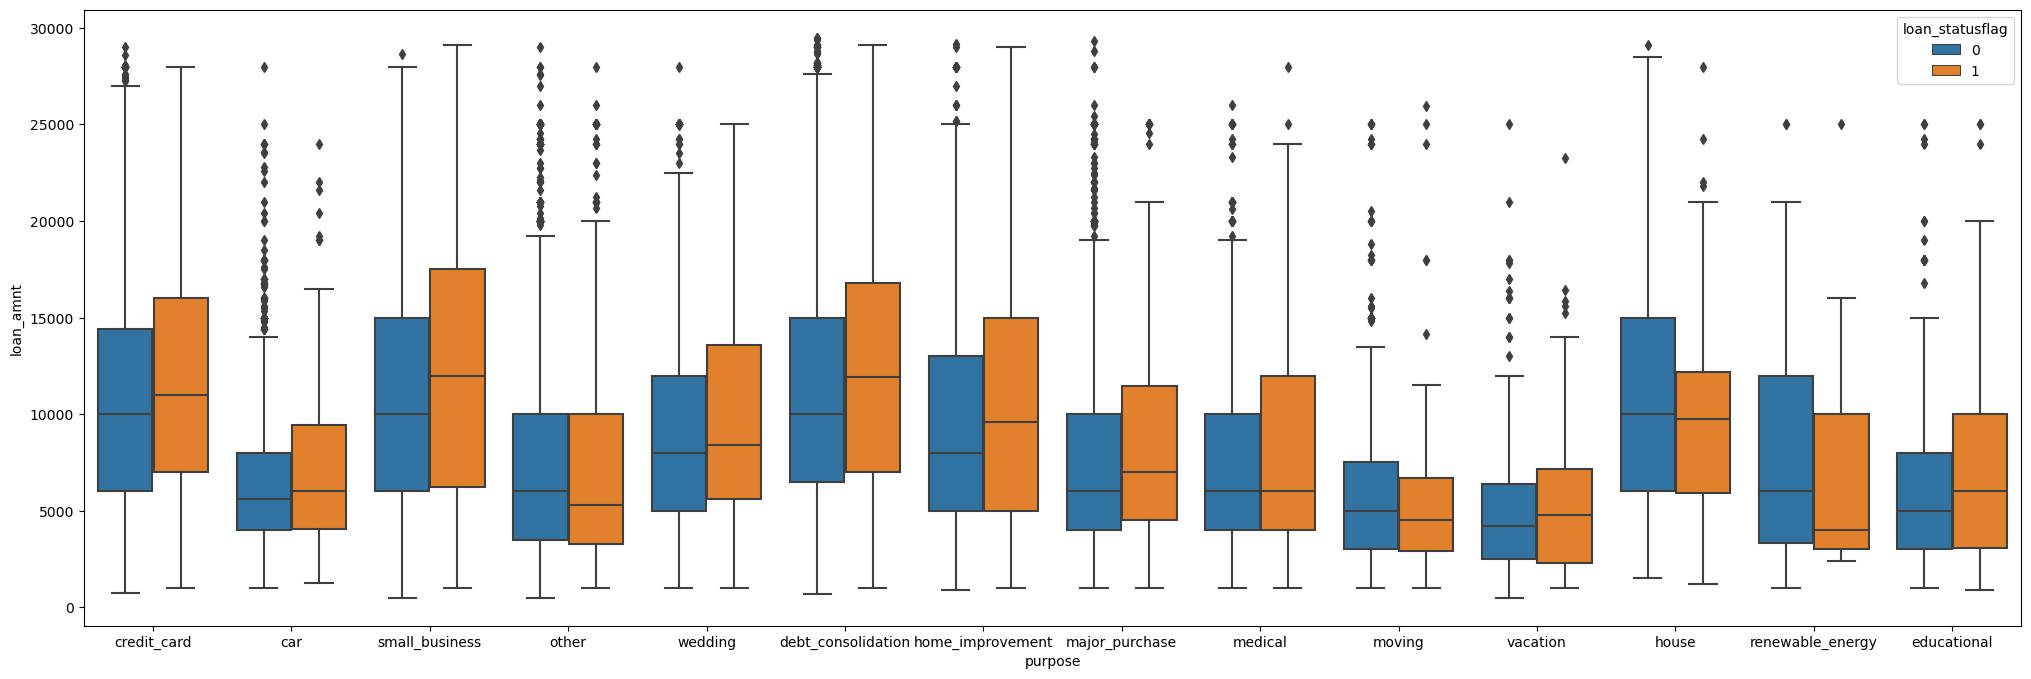

In [128]:
sns.boxplot(data=data_v3,y='loan_amnt',x='purpose',hue='loan_statusflag')
plt.rcParams["figure.figsize"] = [25, 8]

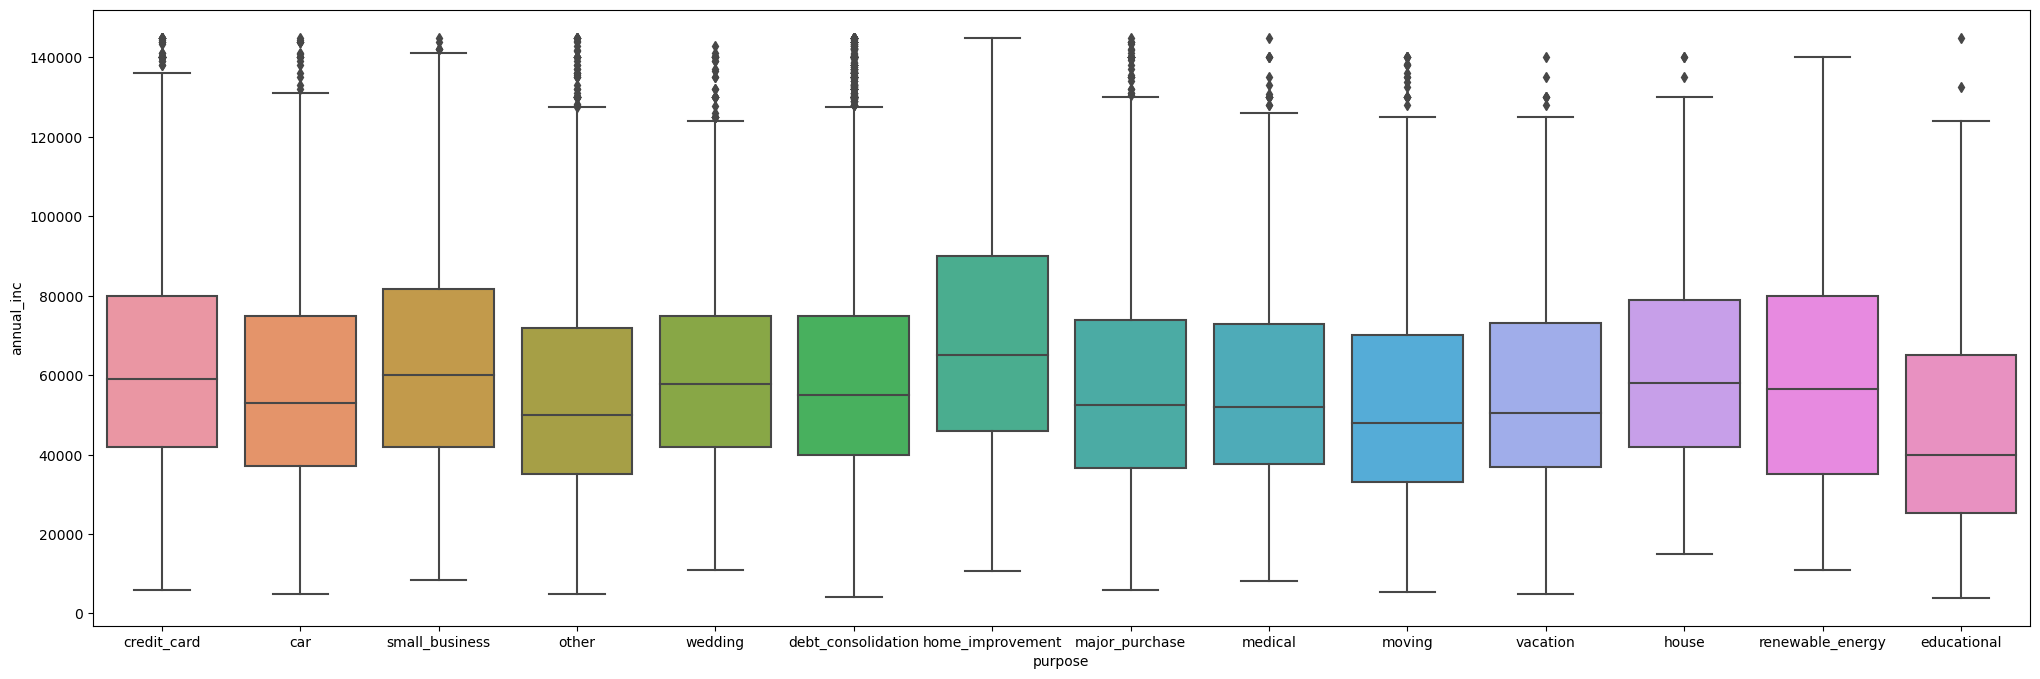

In [129]:
sns.boxplot(data=data_v3,y='annual_inc',x='purpose')
plt.rcParams["figure.figsize"] = [25, 8]

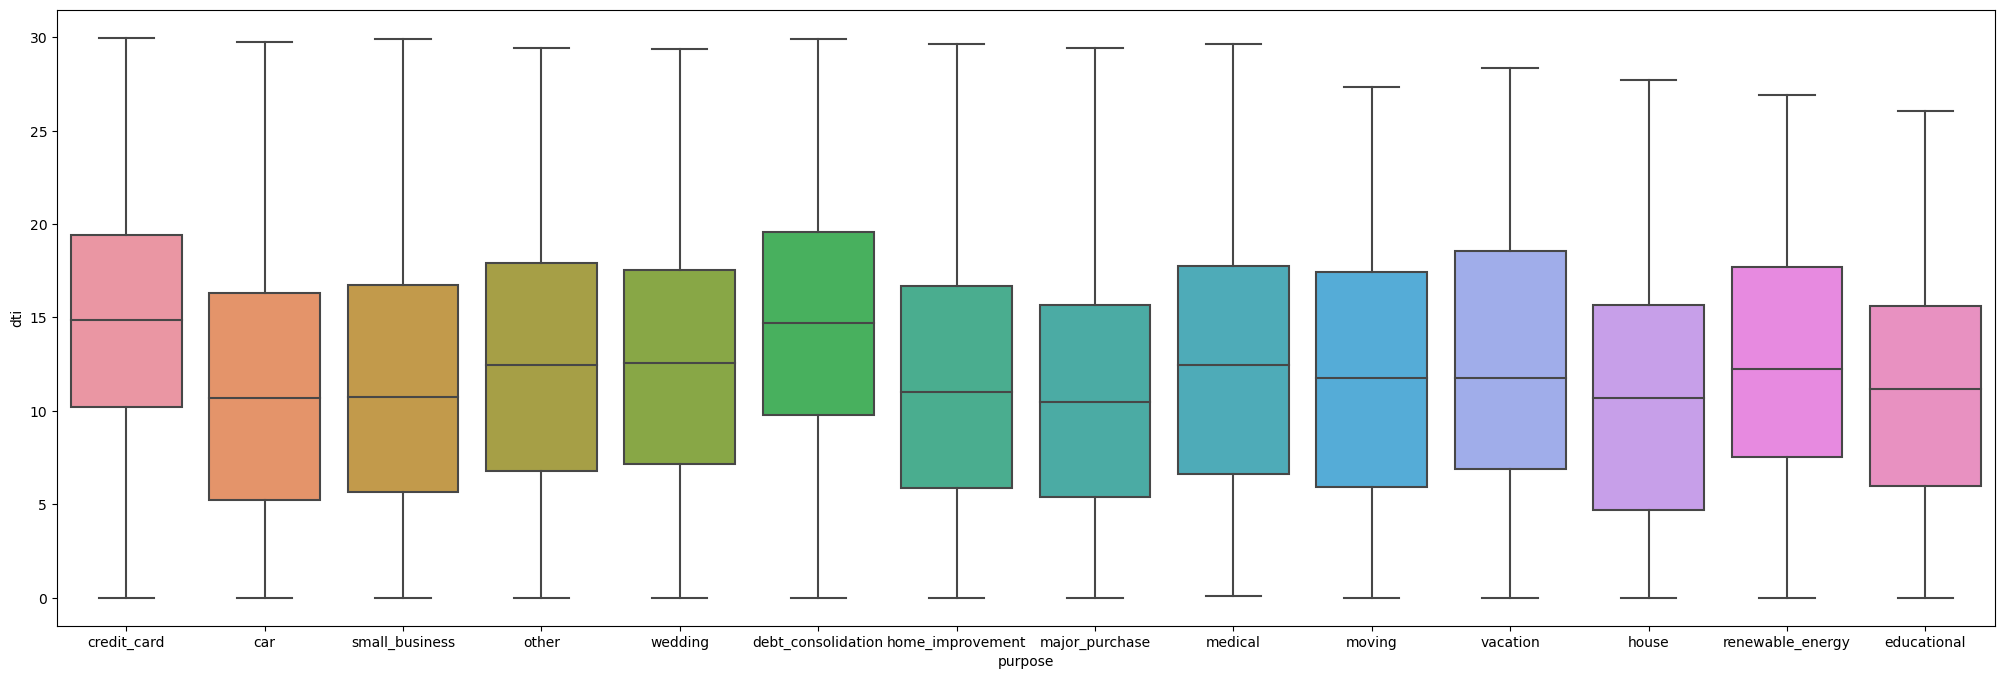

In [130]:
sns.boxplot(data=data_v3,y='dti',x='purpose')
plt.rcParams["figure.figsize"] = [25, 8]

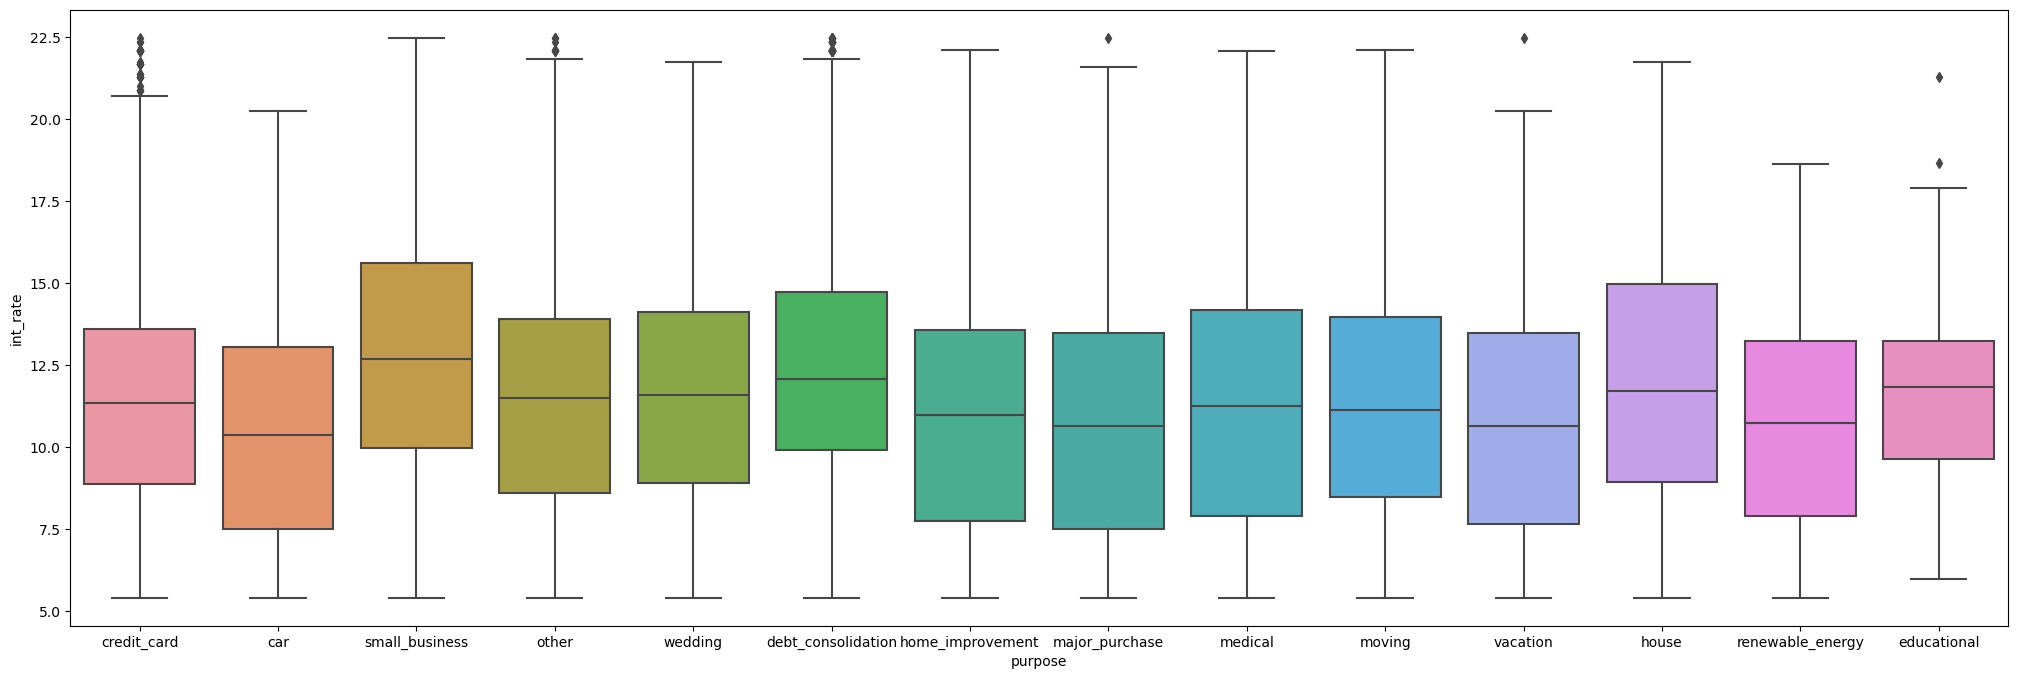

In [131]:
sns.boxplot(data=data_v3,y='int_rate',x='purpose')
plt.rcParams["figure.figsize"] = [25, 8]